# Suplari Data Exercise

This notebook answers the following four questions: 

1. What are the top 10 suppliers for 2017 and how much is spent on each supplier?

2. Which business unit was the top spender so far in 2017?

3. Compare the top 10 suppliers in 2017 to the top suppliers in 2016

4. How many transactions were recorded for 2015, 2016, and 2017 respectively?

To do so, I used the datasets located in the `\Data` folder.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Load datasets

In [2]:
mapping_bu = pd.read_csv('Data/techtrades_bu.csv')
mapping_account = pd.read_csv('Data/techtrades_accounts.csv')
data2015 = pd.read_csv('Data/2015pcard_data.csv')
data2016 = pd.read_csv('Data/2016pcard_data.csv')
data2017 = pd.read_csv('Data/2017pcard_data.csv')

## 0. Data cleaning of the 2017 dataset

I'll begin by exploring and cleaning the 2017 dataset. For now, I'll assume it is similar to the 2015 and 2016 datasets (althought we'll check that assumption later). If they are, we could then replicate the same steps for the other datasets.

### Exploring the 2017 dataset columns

In [3]:
data2017.head(4)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,17pcp8865,18.929075,7/10/2017,76,15100,100,8740,Building Suppliles,Corporate IT
1,17pcp17762,53.014500,6/11/2017,76,15100,100,8740,Building Suppliles,Corporate IT
2,17pcp154402,70.662625,7/29/2017,76,15100,100,8416,Car Rental,Corporate IT
3,17pcp155646,24.557775,5/27/2017,76,15100,100,8416,Car Rental,Corporate IT


In [4]:
data2017.vendor.unique()

array(['76', '01 BARTELL DRUGS', "025 IVAR'S SEATAC", ...,
       "LITTLE ANTHONY'S", "LONGO'S", 'UPEXPRESS.COM'], dtype=object)

In [5]:
with np.printoptions(threshold=np.inf):
    print(data2017.vendor.unique())

['76' '01 BARTELL DRUGS' "025 IVAR'S SEATAC" '1057 JESSIE'
 '32750 - BWI DAILY GARAGE' '3380 SLS LAS VEGAS' '443 N WABASH'
 '4TE*CULLIGAN OF ONTARIO' '51449 - 1616 SANSOM ST'
 '652 FLIGHT TERMINAL A' '7 ELEVEN STORE' '72711 - THE MAXWELL' '7-ELEVEN'
 '7TH AND PIKE GARAGE' '81411 - THE GROVE - SELF'
 '81577 - THE AMERICANA AT' '81787 - CALIFORNIA MART -'
 '82072 - 1600 SEVENTH AVE' '82636 - 100 N. LA CIENEGA'
 '85C BAKERY CAFE USA' '91 EXPRESS LANES REBILLS' '99 CENTS ONLY STORES'
 '99228 - 149 NEWBURY STREE' '99-CENTS-ONLY' 'A&W'
 'A-1 AIRLINE TAXI AND VAN' 'A4U' 'AA INFLIGHT VISA FACET'
 'AAROPORT LIMOUSINE SER' 'ABC COCINA' 'ABC DISPOSAL SYSTEMS INC'
 'ABC HAWAII' 'ABC KITCHEN' 'ABM ONSITE THE BLOC'
 'ABM ONSITE WESTFIELD MALL' 'ABM PARKING LIBERTY CENTE'
 'ABM PARKING SAN JOSE AIRP' 'ABM PARKING SHOPS AT MIDT'
 'ABSOLUT DIESEL REPAIR LL' 'ABSOPURE WATER COMPANY' 'AC MOORE STR'
 'ACCENTS' 'ACCESS' 'ACCESS INFO MGMT' 'ACE HOTEL DOWNTOWN LA'
 'ACE HOTEL DOWNTOWN LA F&B' 'ACE HOTEL NEW 

We have seven columns:
- `transactionid`: the id of the transaction.
- `amount`: the cost of the transaction.
- `transactiondate`: the date of the transaction.
- `vendor`: name of the vendor
- `merchantcode`: a code specific to each vendor. 
- `bu`: bussiness unit of the vendor that made the transaction.
- `account`: name of the vendor account (e.g., Professional Services, Advertisement).
- `ExpenseType`: the nature of the transaction.
- `costcenter`: cost center (a department within a company) of the vendor. 

In [6]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189858 entries, 0 to 189857
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   transactionid    189858 non-null  object 
 1   amount           189858 non-null  float64
 2   transactiondate  189858 non-null  object 
 3   vendor           189858 non-null  object 
 4   merchantcode     189858 non-null  int64  
 5   bu               189858 non-null  int64  
 6   account          189858 non-null  int64  
 7   ExpenseType      189858 non-null  object 
 8   costcenter       189858 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 13.0+ MB


- `transactiondate` is saved as an object. If needed, we could transform it later to a datetime object.
- Also, `merchantcode`, `bu`, and `account` are stored as an `int64` but they should be objects. We have mappings for the last two, so let's use their text names.
- Finally, `costcenter` also has a mapping, but it's almost identical to the values we currently have. 


In [7]:
# Change type of merchant code
data2017.merchantcode = data2017.merchantcode.astype('object')

In [8]:
mapping_bu.head()

,buid,name
0,100,"Techtrades, Inc. (HQ)"
1,110,Techtrades LTD (UK)
2,120,Techtrades NK (Japan)
3,200,"Zeus Banking, Inc."


In [ ]:
mapping_bu_dict

In [9]:
#Mapping bu
mapping_bu_dict = mapping_bu.set_index('buid')['name'].to_dict()
data2017.bu = data2017.bu.map(mapping_bu_dict, na_action='ignore')

In [10]:
len(mapping_account)

41

In [11]:
mapping_account.head()

,accountcode,accountname
0,1250,Employee Receivables
1,1500,Other Current Assets
2,1540,Prepaid Vendor Amounts
3,1590,Other Prepaid Expenses
4,6150,Freight Cost


In [12]:
mapping_account.tail()

,accountcode,accountname
36,8645,IT Maintenance
37,8650,Equipment Mantenance and Repair
38,8720,Building Maintenance
39,8730,Property Taxes
40,8740,Building Suppliles


In [13]:
#Mapping account
mapping_account_dict = mapping_account.set_index('accountcode')['accountname'].to_dict()
data2017.account = data2017.account.map(mapping_account_dict, na_action='ignore')

In [14]:
# Check dataset again
data2017.head(4)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,17pcp8865,18.929075,7/10/2017,76,15100,"Techtrades, Inc. (HQ)",Building Suppliles,Building Suppliles,Corporate IT
1,17pcp17762,53.014500,6/11/2017,76,15100,"Techtrades, Inc. (HQ)",Building Suppliles,Building Suppliles,Corporate IT
2,17pcp154402,70.662625,7/29/2017,76,15100,"Techtrades, Inc. (HQ)",Car Rental,Car Rental,Corporate IT
3,17pcp155646,24.557775,5/27/2017,76,15100,"Techtrades, Inc. (HQ)",Car Rental,Car Rental,Corporate IT


In [15]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189858 entries, 0 to 189857
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   transactionid    189858 non-null  object 
 1   amount           189858 non-null  float64
 2   transactiondate  189858 non-null  object 
 3   vendor           189858 non-null  object 
 4   merchantcode     189858 non-null  object 
 5   bu               189858 non-null  object 
 6   account          189858 non-null  object 
 7   ExpenseType      189858 non-null  object 
 8   costcenter       189858 non-null  object 
dtypes: float64(1), object(8)
memory usage: 13.0+ MB


### Exploring null values

In [16]:
data2017.isnull().sum()

transactionid      0
amount             0
transactiondate    0
vendor             0
merchantcode       0
bu                 0
account            0
ExpenseType        0
costcenter         0
dtype: int64

No missing values! Great!

### Checking for duplicate ids

In [17]:
data2017.transactionid.duplicated().sum() # The result of the duplicated() is a boolean Series, and we can add them up to count the number of duplicates. Behind the theme, True get converted to 1 and False get converted to 0, then it adds them up.

0

No duplicate ids. Cool.

### Checking the amount column

In [18]:
data2017.amount.describe()

count    189858.000000
mean        254.479514
std        4622.354189
min      -20147.987750
25%           8.281412
50%          28.325357
75%         107.984436
max      765407.166000
Name: amount, dtype: float64

We seem to have positive and negative values. The positive values probably refer to a payment made to the supplier. In contrast, negative values could mean a couple of things. As specified by personal correspondence with Suplari, it could mean that 
- the transaction got cancelled,
- the transaction was done using credit card (although I'm still confused as to why is appears as a negative number), or
- there was an internal consolidation in total amounts. 

Considering these three scenarios, it seems safe to assume that negative numbers represent a positive balance for Tech Trades. Just for the sake of comprehensiveness, let's explore positive and negative numbers separately.

In [19]:
data2017_positives = data2017.loc[data2017.amount >= 0]
data2017_negatives = data2017.loc[data2017.amount < 0]

In [20]:
print('Positives: ', len(data2017_positives))
print('Negatives: ', len(data2017_negatives))

Positives:  187370
Negatives:  2488


#### Exploring positive values

In [21]:
data2017_positives.describe()

,amount
count,187370.000000
mean,260.834519
std,4651.473131
min,0.001870
25%,8.796129
50%,29.370687
75%,110.103262
max,765407.166000


It seems that we have one or more clear outliers, since the highest values is many standard deviations from the mean. Also, the mean is higher than 75% of our values. 

In [22]:
percentiles = list(range(10, 100, 5))
for percentile in percentiles:
    print(f'Percentile {percentile}:', data2017_positives.amount.quantile(percentile/100))

Percentile 10: 3.19022
Percentile 15: 4.6937
Percentile 20: 6.522373000000003
Percentile 25: 8.796129375
Percentile 30: 11.45375
Percentile 35: 14.57478
Percentile 40: 18.472795
Percentile 45: 23.258125
Percentile 50: 29.3706875
Percentile 55: 37.32982825000001
Percentile 60: 48.3111695
Percentile 65: 62.39801975
Percentile 70: 81.8125
Percentile 75: 110.1032625
Percentile 80: 151.2395225000002
Percentile 85: 222.0625
Percentile 90: 356.84322685000006
Percentile 95: 684.7170962499999


Yes, there are several outliers that are skewing the distribution, since the 95th percentile is less than 700. 

In [23]:
sns.set_theme()

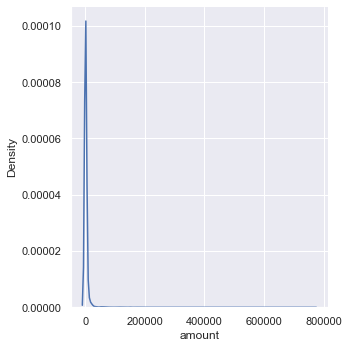

In [24]:
sns.displot(round(data2017_positives.loc[data2017_positives.amount > 700, 'amount']), kind="kde");

There are so few values with high amounts that they do not even appear in this graph. Let's try with another one that uses values higher than 20,000.

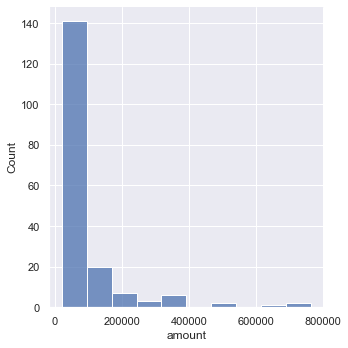

In [25]:
sns.displot(round(data2017_positives.loc[data2017_positives.amount > 20_000, 'amount']), bins=10);

Our graph confirms that there are very few rows (less than 10) with a very high amount value. 

In [26]:
data2017_positives.sort_values(by='amount', ascending=False).head(10)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
21317,17pcp69068,765407.1660,3/15/2017,"Oracle, Inc.",52477,"Techtrades, Inc. (HQ)",IT Software,IT Software,Corporate IT
135621,17pcp69069,764172.0400,6/15/2017,"Oracle, Inc.",52477,"Techtrades, Inc. (HQ)",IT Software,IT Software,Operations
36754,17pcp161925,682886.3522,7/30/2017,"Apple, Inc.",17958,Techtrades LTD (UK),IT Hardware Servers,Prepaid Vendor Amounts,Executive
180566,17pcp46257,519933.0235,4/23/2017,Microsoft Corporation,26078,Techtrades NK (Japan),Freight Cost,Freight Cost,Sales
113146,17pcp161924,511700.1956,7/30/2017,"Apple, Inc.",17958,Techtrades LTD (UK),IT Hardware Servers,Prepaid Vendor Amounts,Operations
127450,17pcp25437,369657.7500,4/4/2017,IBM,36335,"Techtrades, Inc. (HQ)",IT Software,IT Software,Operations
59194,17pcp93186,358907.4974,5/23/2017,Spiceworks,44293,Techtrades LTD (UK),Telecommunications - Voice,Telecommunications - Voice,Facilities
11195,17pcp93175,344851.9986,7/25/2017,Ernst & Young,44293,Techtrades LTD (UK),Telecommunications - Voice,Telecommunications - Voice,Corporate IT
131032,17pcp46261,343553.4127,6/24/2017,Microsoft Corporation,26078,Techtrades NK (Japan),Freight Cost,Freight Cost,Operations
162629,17pcp46258,329959.1158,5/2/2017,Microsoft Corporation,26078,Techtrades NK (Japan),Freight Cost,Freight Cost,Product


These are some of the rows that seem to be skewing the distributions. They will probably have a big influence in the answer we give to the question of this section. 

#### Exploring negative values

In [27]:
data2017_negatives.describe()

,amount
count,2488.000000
mean,-224.112625
std,893.094370
min,-20147.987750
25%,-144.379194
50%,-37.585317
75%,-9.846251
max,-0.000935


Just as before, we seem to have a couple of outliers, since the mean is higher (or, in this case with negative values, lower) than the mean.

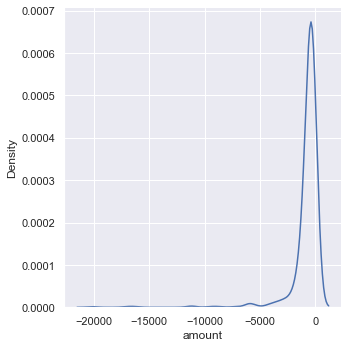

In [28]:
sns.displot(round(data2017_negatives.loc[data2017_negatives.amount < -145, 'amount']), kind="kde");

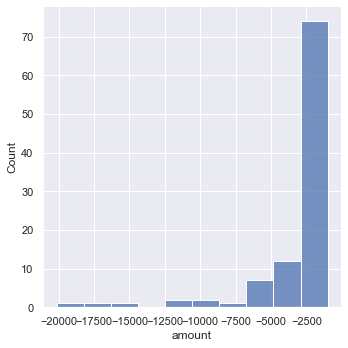

In [29]:
sns.displot(round(data2017_negatives.loc[data2017_negatives.amount < -1000, 'amount']), bins=10);

Yes, again we seem to have some values that skew the distribution. 

In [30]:
data2017_negatives.sort_values(by='amount', ascending=True).head(10)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
175283,17pcp71390,-20147.987750,2/2/2017,CENTURYLINK,23865,"Techtrades, Inc. (HQ)",IT Hardware Servers,Airfare,Sales
74702,17pcp71001,-16954.729000,7/7/2017,CENTURYLINK,23865,Techtrades LTD (UK),IT Hardware Servers,Airfare,Human Resources
118171,17pcp71262,-16299.681090,1/28/2017,CENTURYLINK,23865,"Techtrades, Inc. (HQ)",IT Hardware Servers,Airfare,Operations
16424,17pcp35001,-11220.000000,7/15/2017,LEE HECHT HARRISON,32974,Techtrades LTD (UK),Professional Services,Professional Services,Corporate IT
82995,17pcp166599,-11135.322660,7/11/2017,British Airways,19825,"Techtrades, Inc. (HQ)",IT Hardware Servers,Airfare,Legal
175257,17pcp69961,-9410.652515,2/25/2017,CENTURYLINK,23865,"Zeus Banking, Inc.",IT Hardware Servers,Airfare,Sales
4154,17pcp166614,-8730.225900,4/10/2017,British Airways,19825,"Techtrades, Inc. (HQ)",IT Hardware Servers,Airfare,Corporate IT
185710,17pcp150873,-7193.212125,6/18/2017,STARBUCKS COLORADO,54423,Techtrades LTD (UK),Office Supplies,Office Supplies,Sales
40288,17pcp39930,-6019.018088,2/2/2017,MALLORY PAINT STORE IN,34056,"Techtrades, Inc. (HQ)",Outside Services,Prepaid Vendor Amounts,Executive
68543,17pcp159131,-6009.053325,5/26/2017,NIM*nextissue.com,17022,Techtrades LTD (UK),IT Hardware Servers,Airfare,Finance


There are big reimbursements made by the company CENTURYLINK.

### Cleaning the vendor column

We should also check whether we have duplicate values in the vendor column. This is necessary because a vendor's name could be listed, for example, in lowercase and in uppercase.

In [31]:
# Apply uppercase and remove whitespaces or special characters
data2017.vendor = data2017.vendor.str.upper().str.strip()

In [32]:
for x in range(0, 10):
    print(x)

0
1
2
3
4
5
6
7
8
9


Now let's write some code to detect those vendors whose name's begin with the same 4 characters. This should allow us to compare the names and see whether they refer to the same one.

In [82]:
# Create copy of dataset to test code below
data_test = data2017.copy()
data_test.shape

(189858, 9)

¡Warning! Long list ahead, so scroll down. 

In [84]:
### Detect vendors begining with the same characters

num_characters = 4
print(f'----Vendors with same initial {num_characters} characters:----')

# Select a value in a row
already_checked = []
for i in range(len(data_test)):
    original_value = data_test.loc[i, 'vendor']
    
    # Check if the value has already been compared with other rows
    if original_value in already_checked:
        pass
    
    # If not, select another value for comparison
    else:
        already_checked.append(original_value)
        comparison_already_checked = []
        for x in range(i + 1, len(data_test)):
            comparison_value = data_test.loc[x, 'vendor']
            
            # Check if the comparison value has already been used
            if comparison_value in comparison_already_checked:
                pass
            
            else:
                comparison_already_checked.append(comparison_value)
                
                if (original_value != comparison_value) & (original_value[:num_characters] == comparison_value[:num_characters]):
                    print(f'{original_value} | {comparison_value}')

----Vendors with same initial 4 characters:----
ABC COCINA | ABC DISPOSAL SYSTEMS INC
ABC COCINA | ABC HAWAII
ABC COCINA | ABC KITCHEN
ABC DISPOSAL SYSTEMS INC | ABC HAWAII
ABC DISPOSAL SYSTEMS INC | ABC KITCHEN
ABC DISPOSAL SYSTEMS INC | ABC COCINA
ABC HAWAII | ABC KITCHEN
ABC HAWAII | ABC COCINA
ABC HAWAII | ABC DISPOSAL SYSTEMS INC
ABC KITCHEN | ABC COCINA
ABC KITCHEN | ABC DISPOSAL SYSTEMS INC
ABC KITCHEN | ABC HAWAII
ABM ONSITE THE BLOC | ABM ONSITE WESTFIELD MALL
ABM ONSITE THE BLOC | ABM PARKING LIBERTY CENTE
ABM ONSITE THE BLOC | ABM PARKING SAN JOSE AIRP
ABM ONSITE THE BLOC | ABM PARKING SHOPS AT MIDT
ABM ONSITE WESTFIELD MALL | ABM PARKING LIBERTY CENTE
ABM ONSITE WESTFIELD MALL | ABM PARKING SAN JOSE AIRP
ABM ONSITE WESTFIELD MALL | ABM PARKING SHOPS AT MIDT
ABM ONSITE WESTFIELD MALL | ABM ONSITE THE BLOC
ABM PARKING LIBERTY CENTE | ABM PARKING SAN JOSE AIRP
ABM PARKING LIBERTY CENTE | ABM PARKING SHOPS AT MIDT
ABM PARKING LIBERTY CENTE | ABM ONSITE THE BLOC
ABM PARKING LIBE

AMERICAN ELECTRIC SUPP | AMERICAN TAXI DISPATCH
AMERICAN ELECTRIC SUPP | AMERIPARK CORPORATE
AMERICAN ELECTRIC SUPP | AMERICAN AIR
AMERICAN ELECTRIC SUPP | AMERICAN COACH
AMERICAN TAXI DISPATCH | AMERIPARK CORPORATE
AMERICAN TAXI DISPATCH | AMERICAN AIR
AMERICAN TAXI DISPATCH | AMERICAN COACH
AMERICAN TAXI DISPATCH | AMERICAN ELECTRIC SUPP
AMERIPARK CORPORATE | AMERICAN AIR
AMERIPARK CORPORATE | AMERICAN COACH
AMERIPARK CORPORATE | AMERICAN ELECTRIC SUPP
AMERIPARK CORPORATE | AMERICAN TAXI DISPATCH
APPLE STORE | APPLE, INC.
APPLE STORE | APPLEBEES
APPLE, INC. | APPLEBEES
APPLE, INC. | APPLE STORE
APPLEBEES | APPLE STORE
APPLEBEES | APPLE, INC.
AQUA BAR & GRILLE | AQUA CHILL OF METROPLEX
ARAMARK LAS VEGAS CONV CT | ARAMARK SEATTLE OCS
ARAMARK LAS VEGAS CONV CT | ARAMARK UNIFORM
ARAMARK SEATTLE OCS | ARAMARK UNIFORM
ARAMARK SEATTLE OCS | ARAMARK LAS VEGAS CONV CT
ARAMARK UNIFORM | ARAMARK LAS VEGAS CONV CT
ARAMARK UNIFORM | ARAMARK SEATTLE OCS
ARCHER HOTEL- AUSTIN | ARCHER - AUSTIN F&B
A

CHECKER CABS LTD | CHECKER CABS LTD.
CHECKER CABS LTD | CHECKPOINT SYSTEMS
CHECKER CABS LTD | CHECKER CAB
CHECKER CABS LTD. | CHECKPOINT SYSTEMS
CHECKER CABS LTD. | CHECKER CAB
CHECKER CABS LTD. | CHECKER CABS LTD
CHECKPOINT SYSTEMS | CHECKER CAB
CHECKPOINT SYSTEMS | CHECKER CABS LTD.
CHECKPOINT SYSTEMS | CHECKER CABS LTD
CHEESECAKE BARTON CREEK | CHEESECAKE NASHVILLE
CHEESECAKE BARTON CREEK | CHEESECAKE OAKBROOK
CHEESECAKE BARTON CREEK | CHEESECAKE SEATTLE
CHEESECAKE BARTON CREEK | CHEESECAKE TIGARD
CHEESECAKE NASHVILLE | CHEESECAKE OAKBROOK
CHEESECAKE NASHVILLE | CHEESECAKE SEATTLE
CHEESECAKE NASHVILLE | CHEESECAKE TIGARD
CHEESECAKE NASHVILLE | CHEESECAKE BARTON CREEK
CHEESECAKE OAKBROOK | CHEESECAKE SEATTLE
CHEESECAKE OAKBROOK | CHEESECAKE TIGARD
CHEESECAKE OAKBROOK | CHEESECAKE BARTON CREEK
CHEESECAKE OAKBROOK | CHEESECAKE NASHVILLE
CHEESECAKE SEATTLE | CHEESECAKE TIGARD
CHEESECAKE SEATTLE | CHEESECAKE BARTON CREEK
CHEESECAKE SEATTLE | CHEESECAKE NASHVILLE
CHEESECAKE SEATTLE | CHEE

EARLS HORNBY | EARLS KING STREET
EASY PARK CP 09 QPS | EASYKEYSCOM INC
EASYKEYSCOM INC | EASY PARK CP 09 QPS
EATALY NY MARKET | EATALY RESTAURANTS
EATALY NY MARKET | EATALY RESTAURANTS-CHI
EATALY RESTAURANTS | EATALY RESTAURANTS-CHI
EATALY RESTAURANTS | EATALY NY MARKET
EATALY RESTAURANTS-CHI | EATALY RESTAURANTS
EATALY RESTAURANTS-CHI | EATALY NY MARKET
EINSTEIN BROS BAGELS | EINSTEIN BROS-ONLINE CAT
EINSTEIN BROS BAGELS | EINSTEINS BAGELS
EINSTEIN BROS-ONLINE CAT | EINSTEINS BAGELS
EINSTEIN BROS-ONLINE CAT | EINSTEIN BROS BAGELS
EINSTEINS BAGELS | EINSTEIN BROS BAGELS
EINSTEINS BAGELS | EINSTEIN BROS-ONLINE CAT
ELEMENT | ELEMENT DENVER
ELEMENT | ELEMENT LEXINGTON
ELEMENT DENVER | ELEMENT LEXINGTON
ELEMENT DENVER | ELEMENT
ELEMENT LEXINGTON | ELEMENT
ELEMENT LEXINGTON | ELEMENT DENVER
ENTERPRISE | ENTERPRISE CAR TOLLS
ENTERPRISE | ENTERPRISE RENT-A-CAR
ENTERPRISE CAR TOLLS | ENTERPRISE RENT-A-CAR
ENTERPRISE CAR TOLLS | ENTERPRISE
ENTERPRISE RENT-A-CAR | ENTERPRISE
ENTERPRISE RENT-A-CA

HEART TO HEART FINE JEWEL | HEARTH T1 US POST SECU
HEARTH T1 US POST SECU | HEART TO HEART FINE JEWEL
HERO ACE HARDWARE | HEROKU
HEROKU | HERO ACE HARDWARE
HERTZ | HERTZ TOLL CHARGE
HERTZ TOLL CHARGE | HERTZ
HILTON GARDEN INN | HILTON GARDENS INN SOUTHP
HILTON GARDEN INN | HILTON HOTELS
HILTON GARDEN INN | HILTON STARBUCKS
HILTON GARDEN INN | HILTON STARBUCKS ALII
HILTON GARDEN INN | HILTON TROPICS BAR
HILTON GARDEN INN | HILTONGARDENINN
HILTON GARDEN INN | HILTON RIVER BLENDS
HILTON GARDENS INN SOUTHP | HILTON HOTELS
HILTON GARDENS INN SOUTHP | HILTON STARBUCKS
HILTON GARDENS INN SOUTHP | HILTON STARBUCKS ALII
HILTON GARDENS INN SOUTHP | HILTON TROPICS BAR
HILTON GARDENS INN SOUTHP | HILTONGARDENINN
HILTON GARDENS INN SOUTHP | HILTON GARDEN INN
HILTON GARDENS INN SOUTHP | HILTON RIVER BLENDS
HILTON HOTELS | HILTON STARBUCKS
HILTON HOTELS | HILTON STARBUCKS ALII
HILTON HOTELS | HILTON TROPICS BAR
HILTON HOTELS | HILTONGARDENINN
HILTON HOTELS | HILTON GARDEN INN
HILTON HOTELS | HILTON G

HOTEL OCEANA SANTA BARBAR | HOTEL ANDRA
HOTEL OCEANA SANTA BARBAR | HOTEL DELUXE
HOTEL OCEANA SANTA BARBAR | HOTEL LUCIA
HOTEL OCEANA SANTA BARBAR | HOTEL LE GERMAIN TORON
HOTEL OCEANA SANTA BARBAR | HOTEL MILO
HOTEL ROGER WILLIAMS | HOTEL AT KIRKWOOD CTR
HOTEL ROGER WILLIAMS | HOTEL DEREK
HOTEL ROGER WILLIAMS | HOTEL MAX
HOTEL ROGER WILLIAMS | HOTEL MONACO SLC
HOTEL ROGER WILLIAMS | HOTEL OCEANA SANTA BARBAR
HOTEL ROGER WILLIAMS | HOTEL PALOMAR CHICAGO
HOTEL ROGER WILLIAMS | HOTEL ANDRA
HOTEL ROGER WILLIAMS | HOTEL DELUXE
HOTEL ROGER WILLIAMS | HOTEL LUCIA
HOTEL ROGER WILLIAMS | HOTEL LE GERMAIN TORON
HOTEL ROGER WILLIAMS | HOTEL MILO
HUDSON NEWS | HUDSON NEWS ST
HUDSON NEWS | HUDSON NEWS ST852 CNN
HUDSON NEWS | HUDSON SQUARE PHARMACY
HUDSON NEWS | HUDSON ST
HUDSON NEWS | HUDSONNEWS ST
HUDSON NEWS ST | HUDSON NEWS ST852 CNN
HUDSON NEWS ST | HUDSON SQUARE PHARMACY
HUDSON NEWS ST | HUDSON ST
HUDSON NEWS ST | HUDSONNEWS ST
HUDSON NEWS ST | HUDSON NEWS
HUDSON NEWS ST852 CNN | HUDSON SQUAR

IN *AQUA CHILL OF DALLAS | IN *ANNA BECK DESIGNS
IN *AQUA CHILL OF DALLAS | IN *AQUA CHILL
IN *AQUA CHILL OF METROPL | IN *BLACK TIE LUXURY
IN *AQUA CHILL OF METROPL | IN *BLACK TIE LUXURY CAR
IN *AQUA CHILL OF METROPL | IN *CITY BAKERY CATERING
IN *AQUA CHILL OF METROPL | IN *CUSTOM EDGE INC.
IN *AQUA CHILL OF METROPL | IN *EK BEVERAGE COMPANY
IN *AQUA CHILL OF METROPL | IN *JT ELECTRIC INC
IN *AQUA CHILL OF METROPL | IN *MONTCLAIR/SUMMIT/WAYN
IN *AQUA CHILL OF METROPL | IN *NORTHWEST INDUSTRIAL
IN *AQUA CHILL OF METROPL | IN *PROSHRED
IN *AQUA CHILL OF METROPL | IN *ANNA BECK DESIGNS
IN *AQUA CHILL OF METROPL | IN *AQUA CHILL
IN *AQUA CHILL OF METROPL | IN *AQUA CHILL OF DALLAS
IN *BLACK TIE LUXURY | IN *BLACK TIE LUXURY CAR
IN *BLACK TIE LUXURY | IN *CITY BAKERY CATERING
IN *BLACK TIE LUXURY | IN *CUSTOM EDGE INC.
IN *BLACK TIE LUXURY | IN *EK BEVERAGE COMPANY
IN *BLACK TIE LUXURY | IN *JT ELECTRIC INC
IN *BLACK TIE LUXURY | IN *MONTCLAIR/SUMMIT/WAYN
IN *BLACK TIE LUXURY | IN *NORTH

LA CHECKER CAB | LA CITY METERED PARKING
LA CHECKER CAB | LA CITY PARKING METER
LA CHECKER CAB | LA CARNITA
LA CITY METERED PARKING | LA CITY PARKING METER
LA CITY METERED PARKING | LA CHECKER CAB
LA CITY METERED PARKING | LA CARNITA
LA CITY PARKING METER | LA CHECKER CAB
LA CITY PARKING METER | LA CITY METERED PARKING
LA CITY PARKING METER | LA CARNITA
LAGOS INC | LAGOS WEB SALES
LAGOS WEB SALES | LAGOS INC
LANIER PARKING | LANIKAI JUICE HWN VILLAGE
LANIKAI JUICE HWN VILLAGE | LANIER PARKING
LAX AIRPORT LOT P | LAX OSTERIA
LAX OSTERIA | LAX AIRPORT LOT P
LAZ PARKING | LAZ PKG OAKLAND
LAZ PKG OAKLAND | LAZ PARKING
LE MERIDIEN DALLAS GALLER | LE MERIDIEN DELFINA SANT
LE MERIDIEN DALLAS GALLER | LE MERIDIEN PICCADILLY
LE MERIDIEN DELFINA SANT | LE MERIDIEN PICCADILLY
LE MERIDIEN DELFINA SANT | LE MERIDIEN DALLAS GALLER
LE MERIDIEN PICCADILLY | LE MERIDIEN DALLAS GALLER
LE MERIDIEN PICCADILLY | LE MERIDIEN DELFINA SANT
LE PAIN QUOTIDIEN | LE PARKER MERIDIEN N.Y.
LE PAIN QUOTIDIEN | LE PAR

OFFICE EXPRESS | OFFICE DEPOT
OFFICE EXPRESS | OFFICE MAX ON BOARD CA
OFFICE MAX | OFFICEMAX/OFFICE DEPOT
OFFICE MAX | OFFICEMAX/OFFICEDEPOT
OFFICE MAX | OFFICEMAX/OFFICEDEPOT6161
OFFICE MAX | OFFICEMAX/OFFICEDEPOT6169
OFFICE MAX | OFFICEMAX/OFFICEDEPOT6515
OFFICE MAX | OFFICEMAX/OFFICEDEPOT6840
OFFICE MAX | OFFICEMAX/OFFICEDEPT
OFFICE MAX | OFFICE DEPOT
OFFICE MAX | OFFICE EXPRESS
OFFICE MAX | OFFICE MAX ON BOARD CA
OFFICEMAX/OFFICE DEPOT | OFFICEMAX/OFFICEDEPOT
OFFICEMAX/OFFICE DEPOT | OFFICEMAX/OFFICEDEPOT6161
OFFICEMAX/OFFICE DEPOT | OFFICEMAX/OFFICEDEPOT6169
OFFICEMAX/OFFICE DEPOT | OFFICEMAX/OFFICEDEPOT6515
OFFICEMAX/OFFICE DEPOT | OFFICEMAX/OFFICEDEPOT6840
OFFICEMAX/OFFICE DEPOT | OFFICEMAX/OFFICEDEPT
OFFICEMAX/OFFICE DEPOT | OFFICE DEPOT
OFFICEMAX/OFFICE DEPOT | OFFICE EXPRESS
OFFICEMAX/OFFICE DEPOT | OFFICE MAX
OFFICEMAX/OFFICE DEPOT | OFFICE MAX ON BOARD CA
OFFICEMAX/OFFICEDEPOT | OFFICEMAX/OFFICEDEPOT6161
OFFICEMAX/OFFICEDEPOT | OFFICEMAX/OFFICEDEPOT6169
OFFICEMAX/OFFICEDEPO

PARKING CONCEPTS INC LOC | PARK AMERICA COLUMBIA
PARKING SYSTEMS | PARKINGMETER4
PARKING SYSTEMS | PARKNG MGMT CO 0610211A
PARKING SYSTEMS | PARK & FLY
PARKING SYSTEMS | PARK CENTRAL HOTEL SAN FR
PARKING SYSTEMS | PARK 'N FLY
PARKING SYSTEMS | PARKER MERIDIEN NEW YORK
PARKING SYSTEMS | PARKFAST
PARKING SYSTEMS | PARKING AUTHORITYOFTORONT
PARKING SYSTEMS | PARKING CONCEPTS INC LOC
PARKING SYSTEMS | PARK AMERICA COLUMBIA
PARKINGMETER4 | PARKNG MGMT CO 0610211A
PARKINGMETER4 | PARK & FLY
PARKINGMETER4 | PARK CENTRAL HOTEL SAN FR
PARKINGMETER4 | PARK 'N FLY
PARKINGMETER4 | PARKER MERIDIEN NEW YORK
PARKINGMETER4 | PARKFAST
PARKINGMETER4 | PARKING AUTHORITYOFTORONT
PARKINGMETER4 | PARKING CONCEPTS INC LOC
PARKINGMETER4 | PARKING SYSTEMS
PARKINGMETER4 | PARK AMERICA COLUMBIA
PARKNG MGMT CO 0610211A | PARK & FLY
PARKNG MGMT CO 0610211A | PARK CENTRAL HOTEL SAN FR
PARKNG MGMT CO 0610211A | PARK 'N FLY
PARKNG MGMT CO 0610211A | PARKER MERIDIEN NEW YORK
PARKNG MGMT CO 0610211A | PARKFAST
PARKNG M

SEATTLE SEAHWA | SEATTLE METER PARKING
SEATTLE SPORTS | SEATTLEAP CART/CHAIR/C
SEATTLE SPORTS | SEATTLES EXECUTIVE LIM
SEATTLE SPORTS | SEATTLE 684-PARK
SEATTLE SPORTS | SEATTLE BOTANICA SS Q
SEATTLE SPORTS | SEATTLE MARINERS CONC
SEATTLE SPORTS | SEATTLE SEAHWA
SEATTLE SPORTS | SEATTLE METER PARKING
SEATTLEAP CART/CHAIR/C | SEATTLES EXECUTIVE LIM
SEATTLEAP CART/CHAIR/C | SEATTLE 684-PARK
SEATTLEAP CART/CHAIR/C | SEATTLE BOTANICA SS Q
SEATTLEAP CART/CHAIR/C | SEATTLE MARINERS CONC
SEATTLEAP CART/CHAIR/C | SEATTLE SEAHWA
SEATTLEAP CART/CHAIR/C | SEATTLE METER PARKING
SEATTLEAP CART/CHAIR/C | SEATTLE SPORTS
SEATTLES EXECUTIVE LIM | SEATTLE 684-PARK
SEATTLES EXECUTIVE LIM | SEATTLE BOTANICA SS Q
SEATTLES EXECUTIVE LIM | SEATTLE MARINERS CONC
SEATTLES EXECUTIVE LIM | SEATTLE SEAHWA
SEATTLES EXECUTIVE LIM | SEATTLEAP CART/CHAIR/C
SEATTLES EXECUTIVE LIM | SEATTLE METER PARKING
SEATTLES EXECUTIVE LIM | SEATTLE SPORTS
SHOE DROP | SHOE RESCUE SAVING SOLES
SHOE RESCUE SAVING SOLES | SHOE DROP
SH

SHRED-IT DENVER | SHRED IT WASHINGTON
SHRED-IT DENVER | SHRED-IT
SHRED-IT DENVER | SHRED-IT DALLAS
SHRED-IT DENVER | SHRED-IT-FREMONT
SHRED-IT DENVER | SHRED ALASKA-MOTO ACCT
SHRED-IT DENVER | SHRED WORKS INC
SHRED-IT DENVER | SHRED-IT BRIDGEWATER
SHRED-IT DENVER | SHRED IT SALTLAKE CITY
SHRED-IT LOS ANGELES | SHRED-IT MINNEAPOLIS
SHRED-IT LOS ANGELES | SHRED-IT OMAHA
SHRED-IT LOS ANGELES | SHRED-IT PHOENIX
SHRED-IT LOS ANGELES | SHRED-IT PORTLAND
SHRED-IT LOS ANGELES | SHRED-IT PROVIDENCE
SHRED-IT LOS ANGELES | SHRED-IT SANBERNARDINO
SHRED-IT LOS ANGELES | SHRED-IT SEATTLE
SHRED-IT LOS ANGELES | SHRED-IT ST LOUIS
SHRED-IT LOS ANGELES | SHRED-IT TRENTON
SHRED-IT LOS ANGELES | SHRED-IT USA LLC
SHRED-IT LOS ANGELES | SHRED-IT-BOSTON
SHRED-IT LOS ANGELES | SHRED-IT-CHICAGO
SHRED-IT LOS ANGELES | SHRED-IT-CLEVELAND
SHRED-IT LOS ANGELES | SHRED-IT-DAYTON
SHRED-IT LOS ANGELES | SHRED-IT-DETROIT
SHRED-IT LOS ANGELES | SHRED IT WASHINGTON
SHRED-IT LOS ANGELES | SHRED-IT
SHRED-IT LOS ANGELES | 

SHRED-IT ST LOUIS | SHRED-IT BRIDGEWATER
SHRED-IT ST LOUIS | SHRED IT SALTLAKE CITY
SHRED-IT TRENTON | SHRED-IT USA LLC
SHRED-IT TRENTON | SHRED-IT-BOSTON
SHRED-IT TRENTON | SHRED-IT-CHICAGO
SHRED-IT TRENTON | SHRED-IT-CLEVELAND
SHRED-IT TRENTON | SHRED-IT-DAYTON
SHRED-IT TRENTON | SHRED-IT-DETROIT
SHRED-IT TRENTON | SHRED IT WASHINGTON
SHRED-IT TRENTON | SHRED-IT
SHRED-IT TRENTON | SHRED-IT DALLAS
SHRED-IT TRENTON | SHRED-IT DENVER
SHRED-IT TRENTON | SHRED-IT LOS ANGELES
SHRED-IT TRENTON | SHRED-IT MINNEAPOLIS
SHRED-IT TRENTON | SHRED-IT OMAHA
SHRED-IT TRENTON | SHRED-IT PROVIDENCE
SHRED-IT TRENTON | SHRED-IT SANBERNARDINO
SHRED-IT TRENTON | SHRED-IT SEATTLE
SHRED-IT TRENTON | SHRED-IT ST LOUIS
SHRED-IT TRENTON | SHRED-IT-FREMONT
SHRED-IT TRENTON | SHRED ALASKA-MOTO ACCT
SHRED-IT TRENTON | SHRED WORKS INC
SHRED-IT TRENTON | SHRED-IT PHOENIX
SHRED-IT TRENTON | SHRED-IT PORTLAND
SHRED-IT TRENTON | SHRED-IT BRIDGEWATER
SHRED-IT TRENTON | SHRED IT SALTLAKE CITY
SHRED-IT USA LLC | SHRED-IT

SPECIALTY'S CAFE & BAK | SPECIALTY'S CAFE & BAKERY
SPECIALTY'S CAFE & BAK | SPECIALTYS CAFE BAK
SPECIALTY'S CAFE & BAKERY | SPECIALTYS CAFE BAK
SPECIALTY'S CAFE & BAKERY | SPECIALTY'S CAFE & BAK
SPECIALTYS CAFE BAK | SPECIALTY'S CAFE & BAK
SPECIALTYS CAFE BAK | SPECIALTY'S CAFE & BAKERY
SPRINKLES CUPCAKES | SPRINT *WIRELESS
SPRINT *WIRELESS | SPRINKLES CUPCAKES
SQ *A J TAXI | SQ *ABELLALLC DESPA
SQ *A J TAXI | SQ *ABSOLUTETOWNCAR .COM
SQ *A J TAXI | SQ *ACES TOWN CAR S
SQ *A J TAXI | SQ *ADAM/YELLOW CAB
SQ *A J TAXI | SQ *AIRPORT TAXI
SQ *A J TAXI | SQ *ANCHORHEAD COFF
SQ *A J TAXI | SQ *ANCHORHEAD COFFEE
SQ *A J TAXI | SQ *APANAS COFFEE &
SQ *A J TAXI | SQ *BLUE BOTTLE COF
SQ *A J TAXI | SQ *CAFE GRUMPY FAS
SQ *A J TAXI | SQ *CHERRY STREET COFFEE
SQ *A J TAXI | SQ *CHICAGO CAR SER
SQ *A J TAXI | SQ *DELUCA'S ITALIA
SQ *A J TAXI | SQ *DEMEKE ABEBAW
SQ *A J TAXI | SQ *EXPRESS US SHUT
SQ *A J TAXI | SQ *GREAT AMERICAN BAGEL
SQ *A J TAXI | SQ *GT ACCESS TRANSPORTIO
SQ *A J TAXI | SQ *HANE

SQ *AIRPORT TAXI | SQ *A J TAXI
SQ *AIRPORT TAXI | SQ *ACES TOWN CAR S
SQ *AIRPORT TAXI | SQ *ADAM/YELLOW CAB
SQ *AIRPORT TAXI | SQ *ABELLALLC DESPA
SQ *AIRPORT TAXI | SQ *ABSOLUTETOWNCAR .COM
SQ *AIRPORT TAXI | SQ *SUMMERMOON COFF
SQ *ANCHORHEAD COFF | SQ *ANCHORHEAD COFFEE
SQ *ANCHORHEAD COFF | SQ *APANAS COFFEE &
SQ *ANCHORHEAD COFF | SQ *BLUE BOTTLE COF
SQ *ANCHORHEAD COFF | SQ *CAFE GRUMPY FAS
SQ *ANCHORHEAD COFF | SQ *CHERRY STREET COFFEE
SQ *ANCHORHEAD COFF | SQ *CHICAGO CAR SER
SQ *ANCHORHEAD COFF | SQ *DELUCA'S ITALIA
SQ *ANCHORHEAD COFF | SQ *DEMEKE ABEBAW
SQ *ANCHORHEAD COFF | SQ *EXPRESS US SHUT
SQ *ANCHORHEAD COFF | SQ *GREAT AMERICAN BAGEL
SQ *ANCHORHEAD COFF | SQ *GT ACCESS TRANSPORTIO
SQ *ANCHORHEAD COFF | SQ *HANEEFA TRANSPORTATIO
SQ *ANCHORHEAD COFF | SQ *HILLMAN CASTOR
SQ *ANCHORHEAD COFF | SQ *M&G FOODSTUFF LLC
SQ *ANCHORHEAD COFF | SQ *MELANGE
SQ *ANCHORHEAD COFF | SQ *NYC DELI 7TH AVE HYAT
SQ *ANCHORHEAD COFF | SQ *PHILZ COFFEE
SQ *ANCHORHEAD COFF | SQ *PHILZ COFF

SQ *CHERRY STREET COFFEE | SQ *A J TAXI
SQ *CHERRY STREET COFFEE | SQ *ACES TOWN CAR S
SQ *CHERRY STREET COFFEE | SQ *ADAM/YELLOW CAB
SQ *CHERRY STREET COFFEE | SQ *ANCHORHEAD COFF
SQ *CHERRY STREET COFFEE | SQ *ANCHORHEAD COFFEE
SQ *CHERRY STREET COFFEE | SQ *BLUE BOTTLE COF
SQ *CHERRY STREET COFFEE | SQ *CAFE GRUMPY FAS
SQ *CHERRY STREET COFFEE | SQ *ABELLALLC DESPA
SQ *CHERRY STREET COFFEE | SQ *ABSOLUTETOWNCAR .COM
SQ *CHERRY STREET COFFEE | SQ *AIRPORT TAXI
SQ *CHERRY STREET COFFEE | SQ *SUMMERMOON COFF
SQ *CHICAGO CAR SER | SQ *DELUCA'S ITALIA
SQ *CHICAGO CAR SER | SQ *DEMEKE ABEBAW
SQ *CHICAGO CAR SER | SQ *EXPRESS US SHUT
SQ *CHICAGO CAR SER | SQ *GREAT AMERICAN BAGEL
SQ *CHICAGO CAR SER | SQ *GT ACCESS TRANSPORTIO
SQ *CHICAGO CAR SER | SQ *HANEEFA TRANSPORTATIO
SQ *CHICAGO CAR SER | SQ *HILLMAN CASTOR
SQ *CHICAGO CAR SER | SQ *M&G FOODSTUFF LLC
SQ *CHICAGO CAR SER | SQ *MELANGE
SQ *CHICAGO CAR SER | SQ *NYC DELI 7TH AVE HYAT
SQ *CHICAGO CAR SER | SQ *PHILZ COFFEE
SQ *CHICAGO C

SQ *GT ACCESS TRANSPORTIO | SQ *ABELLALLC DESPA
SQ *GT ACCESS TRANSPORTIO | SQ *ABSOLUTETOWNCAR .COM
SQ *GT ACCESS TRANSPORTIO | SQ *AIRPORT TAXI
SQ *GT ACCESS TRANSPORTIO | SQ *CHICAGO CAR SER
SQ *GT ACCESS TRANSPORTIO | SQ *DELUCA'S ITALIA
SQ *GT ACCESS TRANSPORTIO | SQ *DEMEKE ABEBAW
SQ *GT ACCESS TRANSPORTIO | SQ *SUMMERMOON COFF
SQ *HANEEFA TRANSPORTATIO | SQ *HILLMAN CASTOR
SQ *HANEEFA TRANSPORTATIO | SQ *M&G FOODSTUFF LLC
SQ *HANEEFA TRANSPORTATIO | SQ *MELANGE
SQ *HANEEFA TRANSPORTATIO | SQ *NYC DELI 7TH AVE HYAT
SQ *HANEEFA TRANSPORTATIO | SQ *PHILZ COFFEE
SQ *HANEEFA TRANSPORTATIO | SQ *PHILZ COFFEE IN
SQ *HANEEFA TRANSPORTATIO | SQ *PRIME LIMO TOWNCAR SE
SQ *HANEEFA TRANSPORTATIO | SQ *PROCTOR SHOE REPAIR
SQ *HANEEFA TRANSPORTATIO | SQ *PUBLIC DOMAIN
SQ *HANEEFA TRANSPORTATIO | SQ *STEAMDOT COFFEE
SQ *HANEEFA TRANSPORTATIO | SQ *SWEETGRASS FOOD
SQ *HANEEFA TRANSPORTATIO | SQ *UNITED FOR HIRE
SQ *HANEEFA TRANSPORTATIO | SQ *YELLOW CAB
SQ *HANEEFA TRANSPORTATIO | SQ *YELLOW CA

SQ *PHILZ COFFEE | SQ *ABELLALLC DESPA
SQ *PHILZ COFFEE | SQ *ABSOLUTETOWNCAR .COM
SQ *PHILZ COFFEE | SQ *AIRPORT TAXI
SQ *PHILZ COFFEE | SQ *CHICAGO CAR SER
SQ *PHILZ COFFEE | SQ *DELUCA'S ITALIA
SQ *PHILZ COFFEE | SQ *DEMEKE ABEBAW
SQ *PHILZ COFFEE | SQ *HANEEFA TRANSPORTATIO
SQ *PHILZ COFFEE | SQ *SUMMERMOON COFF
SQ *PHILZ COFFEE | SQ *MELANGE
SQ *PHILZ COFFEE IN | SQ *PRIME LIMO TOWNCAR SE
SQ *PHILZ COFFEE IN | SQ *PROCTOR SHOE REPAIR
SQ *PHILZ COFFEE IN | SQ *PUBLIC DOMAIN
SQ *PHILZ COFFEE IN | SQ *STEAMDOT COFFEE
SQ *PHILZ COFFEE IN | SQ *SWEETGRASS FOOD
SQ *PHILZ COFFEE IN | SQ *UNITED FOR HIRE
SQ *PHILZ COFFEE IN | SQ *YELLOW CAB
SQ *PHILZ COFFEE IN | SQ *YELLOW CAB GOSQ.COM
SQ *PHILZ COFFEE IN | SQ *A J TAXI
SQ *PHILZ COFFEE IN | SQ *ACES TOWN CAR S
SQ *PHILZ COFFEE IN | SQ *ADAM/YELLOW CAB
SQ *PHILZ COFFEE IN | SQ *ANCHORHEAD COFF
SQ *PHILZ COFFEE IN | SQ *ANCHORHEAD COFFEE
SQ *PHILZ COFFEE IN | SQ *BLUE BOTTLE COF
SQ *PHILZ COFFEE IN | SQ *CAFE GRUMPY FAS
SQ *PHILZ COFFEE IN

SQ *SWEETGRASS FOOD | SQ *ABSOLUTETOWNCAR .COM
SQ *SWEETGRASS FOOD | SQ *AIRPORT TAXI
SQ *SWEETGRASS FOOD | SQ *CHICAGO CAR SER
SQ *SWEETGRASS FOOD | SQ *DELUCA'S ITALIA
SQ *SWEETGRASS FOOD | SQ *DEMEKE ABEBAW
SQ *SWEETGRASS FOOD | SQ *HANEEFA TRANSPORTATIO
SQ *SWEETGRASS FOOD | SQ *PHILZ COFFEE
SQ *SWEETGRASS FOOD | SQ *PUBLIC DOMAIN
SQ *SWEETGRASS FOOD | SQ *STEAMDOT COFFEE
SQ *SWEETGRASS FOOD | SQ *SUMMERMOON COFF
SQ *SWEETGRASS FOOD | SQ *MELANGE
SQ *SWEETGRASS FOOD | SQ *PRIME LIMO TOWNCAR SE
SQ *UNITED FOR HIRE | SQ *YELLOW CAB
SQ *UNITED FOR HIRE | SQ *YELLOW CAB GOSQ.COM
SQ *UNITED FOR HIRE | SQ *A J TAXI
SQ *UNITED FOR HIRE | SQ *ACES TOWN CAR S
SQ *UNITED FOR HIRE | SQ *ADAM/YELLOW CAB
SQ *UNITED FOR HIRE | SQ *ANCHORHEAD COFF
SQ *UNITED FOR HIRE | SQ *ANCHORHEAD COFFEE
SQ *UNITED FOR HIRE | SQ *BLUE BOTTLE COF
SQ *UNITED FOR HIRE | SQ *CAFE GRUMPY FAS
SQ *UNITED FOR HIRE | SQ *CHERRY STREET COFFEE
SQ *UNITED FOR HIRE | SQ *EXPRESS US SHUT
SQ *UNITED FOR HIRE | SQ *GREAT AMER

STARBUCKS # | STARBUCKS
STARBUCKS # | STARBUCKS MP 4141 - T
STARBUCKS A | STARBUCKS A CO
STARBUCKS A | STARBUCKS A PD
STARBUCKS A | STARBUCKS A/S
STARBUCKS A | STARBUCKS ATLANTA
STARBUCKS A | STARBUCKS AUSTIN
STARBUCKS A | STARBUCKS B LO
STARBUCKS A | STARBUCKS B UP
STARBUCKS A | STARBUCKS BAGG
STARBUCKS A | STARBUCKS BOISE
STARBUCKS A | STARBUCKS BROWNSBU
STARBUCKS A | STARBUCKS C SE
STARBUCKS A | STARBUCKS C01
STARBUCKS A | STARBUCKS C12
STARBUCKS A | STARBUCKS C21
STARBUCKS A | STARBUCKS C27
STARBUCKS A | STARBUCKS CARD EGIFT
STARBUCKS A | STARBUCKS CARD RELOAD
STARBUCKS A | STARBUCKS CD L
STARBUCKS A | STARBUCKS CENTENNI
STARBUCKS A | STARBUCKS COFFEE
STARBUCKS A | STARBUCKS COFFEE 88QPS
STARBUCKS A | STARBUCKS COLORADO
STARBUCKS A | STARBUCKS COSTA ME
STARBUCKS A | STARBUCKS CTE
STARBUCKS A | STARBUCKS CTL
STARBUCKS A | STARBUCKS D30
STARBUCKS A | STARBUCKS DALLAS
STARBUCKS A | STARBUCKS DUNWOODY
STARBUCKS A | STARBUCKS DURHAM
STARBUCKS A | STARBUCKS E
STARBUCKS A | STARBUCKS EAST

STARBUCKS A/S | STARBUCKS
STARBUCKS A/S | STARBUCKS #
STARBUCKS A/S | STARBUCKS A CO
STARBUCKS A/S | STARBUCKS A PD
STARBUCKS A/S | STARBUCKS MP 4141 - T
STARBUCKS A/S | STARBUCKS A
STARBUCKS ATLANTA | STARBUCKS AUSTIN
STARBUCKS ATLANTA | STARBUCKS B LO
STARBUCKS ATLANTA | STARBUCKS B UP
STARBUCKS ATLANTA | STARBUCKS BAGG
STARBUCKS ATLANTA | STARBUCKS BOISE
STARBUCKS ATLANTA | STARBUCKS BROWNSBU
STARBUCKS ATLANTA | STARBUCKS C SE
STARBUCKS ATLANTA | STARBUCKS C01
STARBUCKS ATLANTA | STARBUCKS C12
STARBUCKS ATLANTA | STARBUCKS C21
STARBUCKS ATLANTA | STARBUCKS C27
STARBUCKS ATLANTA | STARBUCKS CARD EGIFT
STARBUCKS ATLANTA | STARBUCKS CARD RELOAD
STARBUCKS ATLANTA | STARBUCKS CD L
STARBUCKS ATLANTA | STARBUCKS CENTENNI
STARBUCKS ATLANTA | STARBUCKS COFFEE
STARBUCKS ATLANTA | STARBUCKS COFFEE 88QPS
STARBUCKS ATLANTA | STARBUCKS COLORADO
STARBUCKS ATLANTA | STARBUCKS COSTA ME
STARBUCKS ATLANTA | STARBUCKS CTE
STARBUCKS ATLANTA | STARBUCKS CTL
STARBUCKS ATLANTA | STARBUCKS D30
STARBUCKS ATL

STARBUCKS B LO | STARBUCKS
STARBUCKS B LO | STARBUCKS #
STARBUCKS B LO | STARBUCKS A CO
STARBUCKS B LO | STARBUCKS A PD
STARBUCKS B LO | STARBUCKS ATLANTA
STARBUCKS B LO | STARBUCKS AUSTIN
STARBUCKS B LO | STARBUCKS MP 4141 - T
STARBUCKS B LO | STARBUCKS A
STARBUCKS B LO | STARBUCKS A/S
STARBUCKS B UP | STARBUCKS BAGG
STARBUCKS B UP | STARBUCKS BOISE
STARBUCKS B UP | STARBUCKS BROWNSBU
STARBUCKS B UP | STARBUCKS C SE
STARBUCKS B UP | STARBUCKS C01
STARBUCKS B UP | STARBUCKS C12
STARBUCKS B UP | STARBUCKS C21
STARBUCKS B UP | STARBUCKS C27
STARBUCKS B UP | STARBUCKS CARD EGIFT
STARBUCKS B UP | STARBUCKS CARD RELOAD
STARBUCKS B UP | STARBUCKS CD L
STARBUCKS B UP | STARBUCKS CENTENNI
STARBUCKS B UP | STARBUCKS COFFEE
STARBUCKS B UP | STARBUCKS COFFEE 88QPS
STARBUCKS B UP | STARBUCKS COLORADO
STARBUCKS B UP | STARBUCKS COSTA ME
STARBUCKS B UP | STARBUCKS CTE
STARBUCKS B UP | STARBUCKS CTL
STARBUCKS B UP | STARBUCKS D30
STARBUCKS B UP | STARBUCKS DALLAS
STARBUCKS B UP | STARBUCKS DUNWOODY
S

STARBUCKS BOISE | STARBUCKS A
STARBUCKS BOISE | STARBUCKS A/S
STARBUCKS BROWNSBU | STARBUCKS C SE
STARBUCKS BROWNSBU | STARBUCKS C01
STARBUCKS BROWNSBU | STARBUCKS C12
STARBUCKS BROWNSBU | STARBUCKS C21
STARBUCKS BROWNSBU | STARBUCKS C27
STARBUCKS BROWNSBU | STARBUCKS CARD EGIFT
STARBUCKS BROWNSBU | STARBUCKS CARD RELOAD
STARBUCKS BROWNSBU | STARBUCKS CD L
STARBUCKS BROWNSBU | STARBUCKS CENTENNI
STARBUCKS BROWNSBU | STARBUCKS COFFEE
STARBUCKS BROWNSBU | STARBUCKS COFFEE 88QPS
STARBUCKS BROWNSBU | STARBUCKS COLORADO
STARBUCKS BROWNSBU | STARBUCKS COSTA ME
STARBUCKS BROWNSBU | STARBUCKS CTE
STARBUCKS BROWNSBU | STARBUCKS CTL
STARBUCKS BROWNSBU | STARBUCKS D30
STARBUCKS BROWNSBU | STARBUCKS DALLAS
STARBUCKS BROWNSBU | STARBUCKS DUNWOODY
STARBUCKS BROWNSBU | STARBUCKS DURHAM
STARBUCKS BROWNSBU | STARBUCKS E
STARBUCKS BROWNSBU | STARBUCKS EAST
STARBUCKS BROWNSBU | STARBUCKS EUGENE
STARBUCKS BROWNSBU | STARBUCKS EVEN
STARBUCKS BROWNSBU | STARBUCKS FOLSOM
STARBUCKS BROWNSBU | STARBUCKS GATE
S

STARBUCKS C01 | STARBUCKS MP 4141 - T
STARBUCKS C01 | STARBUCKS A
STARBUCKS C01 | STARBUCKS A/S
STARBUCKS C12 | STARBUCKS C21
STARBUCKS C12 | STARBUCKS C27
STARBUCKS C12 | STARBUCKS CARD EGIFT
STARBUCKS C12 | STARBUCKS CARD RELOAD
STARBUCKS C12 | STARBUCKS CD L
STARBUCKS C12 | STARBUCKS CENTENNI
STARBUCKS C12 | STARBUCKS COFFEE
STARBUCKS C12 | STARBUCKS COFFEE 88QPS
STARBUCKS C12 | STARBUCKS COLORADO
STARBUCKS C12 | STARBUCKS COSTA ME
STARBUCKS C12 | STARBUCKS CTE
STARBUCKS C12 | STARBUCKS CTL
STARBUCKS C12 | STARBUCKS D30
STARBUCKS C12 | STARBUCKS DALLAS
STARBUCKS C12 | STARBUCKS DUNWOODY
STARBUCKS C12 | STARBUCKS DURHAM
STARBUCKS C12 | STARBUCKS E
STARBUCKS C12 | STARBUCKS EAST
STARBUCKS C12 | STARBUCKS EUGENE
STARBUCKS C12 | STARBUCKS EVEN
STARBUCKS C12 | STARBUCKS FOLSOM
STARBUCKS C12 | STARBUCKS GATE
STARBUCKS C12 | STARBUCKS GRANADA
STARBUCKS C12 | STARBUCKS GREENWOO
STARBUCKS C12 | STARBUCKS H02
STARBUCKS C12 | STARBUCKS H06
STARBUCKS C12 | STARBUCKS HARRISBU
STARBUCKS C12 | STA

STARBUCKS CARD EGIFT | STARBUCKS
STARBUCKS CARD EGIFT | STARBUCKS #
STARBUCKS CARD EGIFT | STARBUCKS A CO
STARBUCKS CARD EGIFT | STARBUCKS A PD
STARBUCKS CARD EGIFT | STARBUCKS ATLANTA
STARBUCKS CARD EGIFT | STARBUCKS AUSTIN
STARBUCKS CARD EGIFT | STARBUCKS B LO
STARBUCKS CARD EGIFT | STARBUCKS B UP
STARBUCKS CARD EGIFT | STARBUCKS BAGG
STARBUCKS CARD EGIFT | STARBUCKS BOISE
STARBUCKS CARD EGIFT | STARBUCKS BROWNSBU
STARBUCKS CARD EGIFT | STARBUCKS C SE
STARBUCKS CARD EGIFT | STARBUCKS C01
STARBUCKS CARD EGIFT | STARBUCKS C12
STARBUCKS CARD EGIFT | STARBUCKS C21
STARBUCKS CARD EGIFT | STARBUCKS C27
STARBUCKS CARD EGIFT | STARBUCKS MP 4141 - T
STARBUCKS CARD EGIFT | STARBUCKS A
STARBUCKS CARD EGIFT | STARBUCKS A/S
STARBUCKS CARD RELOAD | STARBUCKS CD L
STARBUCKS CARD RELOAD | STARBUCKS CENTENNI
STARBUCKS CARD RELOAD | STARBUCKS COFFEE
STARBUCKS CARD RELOAD | STARBUCKS COFFEE 88QPS
STARBUCKS CARD RELOAD | STARBUCKS COLORADO
STARBUCKS CARD RELOAD | STARBUCKS COSTA ME
STARBUCKS CARD RELOAD

STARBUCKS CENTENNI | STARBUCKS
STARBUCKS CENTENNI | STARBUCKS #
STARBUCKS CENTENNI | STARBUCKS A CO
STARBUCKS CENTENNI | STARBUCKS A PD
STARBUCKS CENTENNI | STARBUCKS ATLANTA
STARBUCKS CENTENNI | STARBUCKS AUSTIN
STARBUCKS CENTENNI | STARBUCKS B LO
STARBUCKS CENTENNI | STARBUCKS B UP
STARBUCKS CENTENNI | STARBUCKS BAGG
STARBUCKS CENTENNI | STARBUCKS BOISE
STARBUCKS CENTENNI | STARBUCKS BROWNSBU
STARBUCKS CENTENNI | STARBUCKS C SE
STARBUCKS CENTENNI | STARBUCKS C01
STARBUCKS CENTENNI | STARBUCKS C12
STARBUCKS CENTENNI | STARBUCKS C21
STARBUCKS CENTENNI | STARBUCKS C27
STARBUCKS CENTENNI | STARBUCKS CARD RELOAD
STARBUCKS CENTENNI | STARBUCKS CARD EGIFT
STARBUCKS CENTENNI | STARBUCKS CD L
STARBUCKS CENTENNI | STARBUCKS MP 4141 - T
STARBUCKS CENTENNI | STARBUCKS A
STARBUCKS CENTENNI | STARBUCKS A/S
STARBUCKS COFFEE | STARBUCKS COFFEE 88QPS
STARBUCKS COFFEE | STARBUCKS COLORADO
STARBUCKS COFFEE | STARBUCKS COSTA ME
STARBUCKS COFFEE | STARBUCKS CTE
STARBUCKS COFFEE | STARBUCKS CTL
STARBUCKS 

STARBUCKS COLORADO | STARBUCKS
STARBUCKS COLORADO | STARBUCKS #
STARBUCKS COLORADO | STARBUCKS A CO
STARBUCKS COLORADO | STARBUCKS A PD
STARBUCKS COLORADO | STARBUCKS ATLANTA
STARBUCKS COLORADO | STARBUCKS AUSTIN
STARBUCKS COLORADO | STARBUCKS B LO
STARBUCKS COLORADO | STARBUCKS B UP
STARBUCKS COLORADO | STARBUCKS BAGG
STARBUCKS COLORADO | STARBUCKS BOISE
STARBUCKS COLORADO | STARBUCKS BROWNSBU
STARBUCKS COLORADO | STARBUCKS C SE
STARBUCKS COLORADO | STARBUCKS C01
STARBUCKS COLORADO | STARBUCKS C12
STARBUCKS COLORADO | STARBUCKS C21
STARBUCKS COLORADO | STARBUCKS C27
STARBUCKS COLORADO | STARBUCKS CARD RELOAD
STARBUCKS COLORADO | STARBUCKS CENTENNI
STARBUCKS COLORADO | STARBUCKS COFFEE
STARBUCKS COLORADO | STARBUCKS COFFEE 88QPS
STARBUCKS COLORADO | STARBUCKS CARD EGIFT
STARBUCKS COLORADO | STARBUCKS CD L
STARBUCKS COLORADO | STARBUCKS MP 4141 - T
STARBUCKS COLORADO | STARBUCKS A
STARBUCKS COLORADO | STARBUCKS A/S
STARBUCKS COSTA ME | STARBUCKS CTE
STARBUCKS COSTA ME | STARBUCKS CTL
ST

STARBUCKS CTL | STARBUCKS
STARBUCKS CTL | STARBUCKS #
STARBUCKS CTL | STARBUCKS A CO
STARBUCKS CTL | STARBUCKS A PD
STARBUCKS CTL | STARBUCKS ATLANTA
STARBUCKS CTL | STARBUCKS AUSTIN
STARBUCKS CTL | STARBUCKS B LO
STARBUCKS CTL | STARBUCKS B UP
STARBUCKS CTL | STARBUCKS BAGG
STARBUCKS CTL | STARBUCKS BOISE
STARBUCKS CTL | STARBUCKS BROWNSBU
STARBUCKS CTL | STARBUCKS C SE
STARBUCKS CTL | STARBUCKS C01
STARBUCKS CTL | STARBUCKS C12
STARBUCKS CTL | STARBUCKS C21
STARBUCKS CTL | STARBUCKS C27
STARBUCKS CTL | STARBUCKS CARD RELOAD
STARBUCKS CTL | STARBUCKS CENTENNI
STARBUCKS CTL | STARBUCKS COFFEE
STARBUCKS CTL | STARBUCKS COFFEE 88QPS
STARBUCKS CTL | STARBUCKS COLORADO
STARBUCKS CTL | STARBUCKS COSTA ME
STARBUCKS CTL | STARBUCKS CTE
STARBUCKS CTL | STARBUCKS CARD EGIFT
STARBUCKS CTL | STARBUCKS CD L
STARBUCKS CTL | STARBUCKS MP 4141 - T
STARBUCKS CTL | STARBUCKS A
STARBUCKS CTL | STARBUCKS A/S
STARBUCKS D30 | STARBUCKS DALLAS
STARBUCKS D30 | STARBUCKS DUNWOODY
STARBUCKS D30 | STARBUCKS DUR

STARBUCKS DUNWOODY | STARBUCKS
STARBUCKS DUNWOODY | STARBUCKS #
STARBUCKS DUNWOODY | STARBUCKS A CO
STARBUCKS DUNWOODY | STARBUCKS A PD
STARBUCKS DUNWOODY | STARBUCKS ATLANTA
STARBUCKS DUNWOODY | STARBUCKS AUSTIN
STARBUCKS DUNWOODY | STARBUCKS B LO
STARBUCKS DUNWOODY | STARBUCKS B UP
STARBUCKS DUNWOODY | STARBUCKS BAGG
STARBUCKS DUNWOODY | STARBUCKS BOISE
STARBUCKS DUNWOODY | STARBUCKS BROWNSBU
STARBUCKS DUNWOODY | STARBUCKS C SE
STARBUCKS DUNWOODY | STARBUCKS C01
STARBUCKS DUNWOODY | STARBUCKS C12
STARBUCKS DUNWOODY | STARBUCKS C21
STARBUCKS DUNWOODY | STARBUCKS C27
STARBUCKS DUNWOODY | STARBUCKS CARD RELOAD
STARBUCKS DUNWOODY | STARBUCKS CENTENNI
STARBUCKS DUNWOODY | STARBUCKS COFFEE
STARBUCKS DUNWOODY | STARBUCKS COFFEE 88QPS
STARBUCKS DUNWOODY | STARBUCKS COLORADO
STARBUCKS DUNWOODY | STARBUCKS COSTA ME
STARBUCKS DUNWOODY | STARBUCKS CTE
STARBUCKS DUNWOODY | STARBUCKS CTL
STARBUCKS DUNWOODY | STARBUCKS D30
STARBUCKS DUNWOODY | STARBUCKS DALLAS
STARBUCKS DUNWOODY | STARBUCKS CARD EG

STARBUCKS EAST | STARBUCKS CARD EGIFT
STARBUCKS EAST | STARBUCKS CD L
STARBUCKS EAST | STARBUCKS DUNWOODY
STARBUCKS EAST | STARBUCKS DURHAM
STARBUCKS EAST | STARBUCKS MP 4141 - T
STARBUCKS EAST | STARBUCKS A
STARBUCKS EAST | STARBUCKS A/S
STARBUCKS EUGENE | STARBUCKS EVEN
STARBUCKS EUGENE | STARBUCKS FOLSOM
STARBUCKS EUGENE | STARBUCKS GATE
STARBUCKS EUGENE | STARBUCKS GRANADA
STARBUCKS EUGENE | STARBUCKS GREENWOO
STARBUCKS EUGENE | STARBUCKS H02
STARBUCKS EUGENE | STARBUCKS H06
STARBUCKS EUGENE | STARBUCKS HARRISBU
STARBUCKS EUGENE | STARBUCKS HK A
STARBUCKS EUGENE | STARBUCKS HONOLULU
STARBUCKS EUGENE | STARBUCKS HOUSTON
STARBUCKS EUGENE | STARBUCKS INDIANAP
STARBUCKS EUGENE | STARBUCKS LAFAYETT
STARBUCKS EUGENE | STARBUCKS LOS ANGE
STARBUCKS EUGENE | STARBUCKS MAIN
STARBUCKS EUGENE | STARBUCKS MOL 4191T1
STARBUCKS EUGENE | STARBUCKS N SA
STARBUCKS EUGENE | STARBUCKS NASHVILL
STARBUCKS EUGENE | STARBUCKS NEW YORK
STARBUCKS EUGENE | STARBUCKS ONTARIO
STARBUCKS EUGENE | STARBUCKS OREM


STARBUCKS FOLSOM | STARBUCKS CARD EGIFT
STARBUCKS FOLSOM | STARBUCKS CD L
STARBUCKS FOLSOM | STARBUCKS DUNWOODY
STARBUCKS FOLSOM | STARBUCKS DURHAM
STARBUCKS FOLSOM | STARBUCKS MP 4141 - T
STARBUCKS FOLSOM | STARBUCKS A
STARBUCKS FOLSOM | STARBUCKS A/S
STARBUCKS FOLSOM | STARBUCKS EUGENE
STARBUCKS GATE | STARBUCKS GRANADA
STARBUCKS GATE | STARBUCKS GREENWOO
STARBUCKS GATE | STARBUCKS H02
STARBUCKS GATE | STARBUCKS H06
STARBUCKS GATE | STARBUCKS HARRISBU
STARBUCKS GATE | STARBUCKS HK A
STARBUCKS GATE | STARBUCKS HONOLULU
STARBUCKS GATE | STARBUCKS HOUSTON
STARBUCKS GATE | STARBUCKS INDIANAP
STARBUCKS GATE | STARBUCKS LAFAYETT
STARBUCKS GATE | STARBUCKS LOS ANGE
STARBUCKS GATE | STARBUCKS MAIN
STARBUCKS GATE | STARBUCKS MOL 4191T1
STARBUCKS GATE | STARBUCKS N SA
STARBUCKS GATE | STARBUCKS NASHVILL
STARBUCKS GATE | STARBUCKS NEW YORK
STARBUCKS GATE | STARBUCKS ONTARIO
STARBUCKS GATE | STARBUCKS OREM
STARBUCKS GATE | STARBUCKS PIER C
STARBUCKS GATE | STARBUCKS PORTLAND
STARBUCKS GATE | STA

STARBUCKS GREENWOO | STARBUCKS CARD EGIFT
STARBUCKS GREENWOO | STARBUCKS CD L
STARBUCKS GREENWOO | STARBUCKS DUNWOODY
STARBUCKS GREENWOO | STARBUCKS DURHAM
STARBUCKS GREENWOO | STARBUCKS GATE
STARBUCKS GREENWOO | STARBUCKS MP 4141 - T
STARBUCKS GREENWOO | STARBUCKS A
STARBUCKS GREENWOO | STARBUCKS A/S
STARBUCKS GREENWOO | STARBUCKS EUGENE
STARBUCKS H02 | STARBUCKS H06
STARBUCKS H02 | STARBUCKS HARRISBU
STARBUCKS H02 | STARBUCKS HK A
STARBUCKS H02 | STARBUCKS HONOLULU
STARBUCKS H02 | STARBUCKS HOUSTON
STARBUCKS H02 | STARBUCKS INDIANAP
STARBUCKS H02 | STARBUCKS LAFAYETT
STARBUCKS H02 | STARBUCKS LOS ANGE
STARBUCKS H02 | STARBUCKS MAIN
STARBUCKS H02 | STARBUCKS MOL 4191T1
STARBUCKS H02 | STARBUCKS N SA
STARBUCKS H02 | STARBUCKS NASHVILL
STARBUCKS H02 | STARBUCKS NEW YORK
STARBUCKS H02 | STARBUCKS ONTARIO
STARBUCKS H02 | STARBUCKS OREM
STARBUCKS H02 | STARBUCKS PIER C
STARBUCKS H02 | STARBUCKS PORTLAND
STARBUCKS H02 | STARBUCKS ROTU
STARBUCKS H02 | STARBUCKS SAN ANTO
STARBUCKS H02 | STARB

STARBUCKS HARRISBU | STARBUCKS CARD EGIFT
STARBUCKS HARRISBU | STARBUCKS CD L
STARBUCKS HARRISBU | STARBUCKS DUNWOODY
STARBUCKS HARRISBU | STARBUCKS DURHAM
STARBUCKS HARRISBU | STARBUCKS GATE
STARBUCKS HARRISBU | STARBUCKS H06
STARBUCKS HARRISBU | STARBUCKS MP 4141 - T
STARBUCKS HARRISBU | STARBUCKS A
STARBUCKS HARRISBU | STARBUCKS A/S
STARBUCKS HARRISBU | STARBUCKS EUGENE
STARBUCKS HARRISBU | STARBUCKS H02
STARBUCKS HK A | STARBUCKS HONOLULU
STARBUCKS HK A | STARBUCKS HOUSTON
STARBUCKS HK A | STARBUCKS INDIANAP
STARBUCKS HK A | STARBUCKS LAFAYETT
STARBUCKS HK A | STARBUCKS LOS ANGE
STARBUCKS HK A | STARBUCKS MAIN
STARBUCKS HK A | STARBUCKS MOL 4191T1
STARBUCKS HK A | STARBUCKS N SA
STARBUCKS HK A | STARBUCKS NASHVILL
STARBUCKS HK A | STARBUCKS NEW YORK
STARBUCKS HK A | STARBUCKS ONTARIO
STARBUCKS HK A | STARBUCKS OREM
STARBUCKS HK A | STARBUCKS PIER C
STARBUCKS HK A | STARBUCKS PORTLAND
STARBUCKS HK A | STARBUCKS ROTU
STARBUCKS HK A | STARBUCKS SAN ANTO
STARBUCKS HK A | STARBUCKS SAN 

STARBUCKS HOUSTON | STARBUCKS DALLAS
STARBUCKS HOUSTON | STARBUCKS E
STARBUCKS HOUSTON | STARBUCKS EAST
STARBUCKS HOUSTON | STARBUCKS EVEN
STARBUCKS HOUSTON | STARBUCKS FOLSOM
STARBUCKS HOUSTON | STARBUCKS GRANADA
STARBUCKS HOUSTON | STARBUCKS GREENWOO
STARBUCKS HOUSTON | STARBUCKS HARRISBU
STARBUCKS HOUSTON | STARBUCKS HONOLULU
STARBUCKS HOUSTON | STARBUCKS CARD EGIFT
STARBUCKS HOUSTON | STARBUCKS CD L
STARBUCKS HOUSTON | STARBUCKS DUNWOODY
STARBUCKS HOUSTON | STARBUCKS DURHAM
STARBUCKS HOUSTON | STARBUCKS GATE
STARBUCKS HOUSTON | STARBUCKS H06
STARBUCKS HOUSTON | STARBUCKS HK A
STARBUCKS HOUSTON | STARBUCKS MP 4141 - T
STARBUCKS HOUSTON | STARBUCKS A
STARBUCKS HOUSTON | STARBUCKS A/S
STARBUCKS HOUSTON | STARBUCKS EUGENE
STARBUCKS HOUSTON | STARBUCKS H02
STARBUCKS INDIANAP | STARBUCKS LAFAYETT
STARBUCKS INDIANAP | STARBUCKS LOS ANGE
STARBUCKS INDIANAP | STARBUCKS MAIN
STARBUCKS INDIANAP | STARBUCKS MOL 4191T1
STARBUCKS INDIANAP | STARBUCKS N SA
STARBUCKS INDIANAP | STARBUCKS NASHVILL


STARBUCKS LOS ANGE | STARBUCKS CARD EGIFT
STARBUCKS LOS ANGE | STARBUCKS CD L
STARBUCKS LOS ANGE | STARBUCKS DUNWOODY
STARBUCKS LOS ANGE | STARBUCKS DURHAM
STARBUCKS LOS ANGE | STARBUCKS GATE
STARBUCKS LOS ANGE | STARBUCKS H06
STARBUCKS LOS ANGE | STARBUCKS HK A
STARBUCKS LOS ANGE | STARBUCKS MP 4141 - T
STARBUCKS LOS ANGE | STARBUCKS A
STARBUCKS LOS ANGE | STARBUCKS A/S
STARBUCKS LOS ANGE | STARBUCKS EUGENE
STARBUCKS LOS ANGE | STARBUCKS H02
STARBUCKS MAIN | STARBUCKS MOL 4191T1
STARBUCKS MAIN | STARBUCKS N SA
STARBUCKS MAIN | STARBUCKS NASHVILL
STARBUCKS MAIN | STARBUCKS NEW YORK
STARBUCKS MAIN | STARBUCKS ONTARIO
STARBUCKS MAIN | STARBUCKS OREM
STARBUCKS MAIN | STARBUCKS PIER C
STARBUCKS MAIN | STARBUCKS PORTLAND
STARBUCKS MAIN | STARBUCKS ROTU
STARBUCKS MAIN | STARBUCKS SAN ANTO
STARBUCKS MAIN | STARBUCKS SAN DIEG
STARBUCKS MAIN | STARBUCKS SAN FRAN
STARBUCKS MAIN | STARBUCKS SANTA MO
STARBUCKS MAIN | STARBUCKS SCOTTSDA
STARBUCKS MAIN | STARBUCKS SEATTLE
STARBUCKS MAIN | STARBUCKS 

STARBUCKS N SA | STARBUCKS CARD EGIFT
STARBUCKS N SA | STARBUCKS CD L
STARBUCKS N SA | STARBUCKS DUNWOODY
STARBUCKS N SA | STARBUCKS DURHAM
STARBUCKS N SA | STARBUCKS GATE
STARBUCKS N SA | STARBUCKS H06
STARBUCKS N SA | STARBUCKS HK A
STARBUCKS N SA | STARBUCKS MAIN
STARBUCKS N SA | STARBUCKS MP 4141 - T
STARBUCKS N SA | STARBUCKS A
STARBUCKS N SA | STARBUCKS A/S
STARBUCKS N SA | STARBUCKS EUGENE
STARBUCKS N SA | STARBUCKS H02
STARBUCKS N SA | STARBUCKS MOL 4191T1
STARBUCKS NASHVILL | STARBUCKS NEW YORK
STARBUCKS NASHVILL | STARBUCKS ONTARIO
STARBUCKS NASHVILL | STARBUCKS OREM
STARBUCKS NASHVILL | STARBUCKS PIER C
STARBUCKS NASHVILL | STARBUCKS PORTLAND
STARBUCKS NASHVILL | STARBUCKS ROTU
STARBUCKS NASHVILL | STARBUCKS SAN ANTO
STARBUCKS NASHVILL | STARBUCKS SAN DIEG
STARBUCKS NASHVILL | STARBUCKS SAN FRAN
STARBUCKS NASHVILL | STARBUCKS SANTA MO
STARBUCKS NASHVILL | STARBUCKS SCOTTSDA
STARBUCKS NASHVILL | STARBUCKS SEATTLE
STARBUCKS NASHVILL | STARBUCKS STORE
STARBUCKS NASHVILL | STARB

STARBUCKS ONTARIO | STARBUCKS HOUSTON
STARBUCKS ONTARIO | STARBUCKS INDIANAP
STARBUCKS ONTARIO | STARBUCKS LAFAYETT
STARBUCKS ONTARIO | STARBUCKS LOS ANGE
STARBUCKS ONTARIO | STARBUCKS N SA
STARBUCKS ONTARIO | STARBUCKS NASHVILL
STARBUCKS ONTARIO | STARBUCKS NEW YORK
STARBUCKS ONTARIO | STARBUCKS CARD EGIFT
STARBUCKS ONTARIO | STARBUCKS CD L
STARBUCKS ONTARIO | STARBUCKS DUNWOODY
STARBUCKS ONTARIO | STARBUCKS DURHAM
STARBUCKS ONTARIO | STARBUCKS GATE
STARBUCKS ONTARIO | STARBUCKS H06
STARBUCKS ONTARIO | STARBUCKS HK A
STARBUCKS ONTARIO | STARBUCKS MAIN
STARBUCKS ONTARIO | STARBUCKS MP 4141 - T
STARBUCKS ONTARIO | STARBUCKS A
STARBUCKS ONTARIO | STARBUCKS A/S
STARBUCKS ONTARIO | STARBUCKS EUGENE
STARBUCKS ONTARIO | STARBUCKS H02
STARBUCKS ONTARIO | STARBUCKS MOL 4191T1
STARBUCKS OREM | STARBUCKS PIER C
STARBUCKS OREM | STARBUCKS PORTLAND
STARBUCKS OREM | STARBUCKS ROTU
STARBUCKS OREM | STARBUCKS SAN ANTO
STARBUCKS OREM | STARBUCKS SAN DIEG
STARBUCKS OREM | STARBUCKS SAN FRAN
STARBUCKS O

STARBUCKS PORTLAND | STARBUCKS E
STARBUCKS PORTLAND | STARBUCKS EAST
STARBUCKS PORTLAND | STARBUCKS EVEN
STARBUCKS PORTLAND | STARBUCKS FOLSOM
STARBUCKS PORTLAND | STARBUCKS GRANADA
STARBUCKS PORTLAND | STARBUCKS GREENWOO
STARBUCKS PORTLAND | STARBUCKS HARRISBU
STARBUCKS PORTLAND | STARBUCKS HONOLULU
STARBUCKS PORTLAND | STARBUCKS HOUSTON
STARBUCKS PORTLAND | STARBUCKS INDIANAP
STARBUCKS PORTLAND | STARBUCKS LAFAYETT
STARBUCKS PORTLAND | STARBUCKS LOS ANGE
STARBUCKS PORTLAND | STARBUCKS N SA
STARBUCKS PORTLAND | STARBUCKS NASHVILL
STARBUCKS PORTLAND | STARBUCKS NEW YORK
STARBUCKS PORTLAND | STARBUCKS ONTARIO
STARBUCKS PORTLAND | STARBUCKS OREM
STARBUCKS PORTLAND | STARBUCKS CARD EGIFT
STARBUCKS PORTLAND | STARBUCKS CD L
STARBUCKS PORTLAND | STARBUCKS DUNWOODY
STARBUCKS PORTLAND | STARBUCKS DURHAM
STARBUCKS PORTLAND | STARBUCKS GATE
STARBUCKS PORTLAND | STARBUCKS H06
STARBUCKS PORTLAND | STARBUCKS HK A
STARBUCKS PORTLAND | STARBUCKS MAIN
STARBUCKS PORTLAND | STARBUCKS MP 4141 - T
STARBU

STARBUCKS SAN DIEG | STARBUCKS D30
STARBUCKS SAN DIEG | STARBUCKS DALLAS
STARBUCKS SAN DIEG | STARBUCKS E
STARBUCKS SAN DIEG | STARBUCKS EAST
STARBUCKS SAN DIEG | STARBUCKS EVEN
STARBUCKS SAN DIEG | STARBUCKS FOLSOM
STARBUCKS SAN DIEG | STARBUCKS GRANADA
STARBUCKS SAN DIEG | STARBUCKS GREENWOO
STARBUCKS SAN DIEG | STARBUCKS HARRISBU
STARBUCKS SAN DIEG | STARBUCKS HONOLULU
STARBUCKS SAN DIEG | STARBUCKS HOUSTON
STARBUCKS SAN DIEG | STARBUCKS INDIANAP
STARBUCKS SAN DIEG | STARBUCKS LAFAYETT
STARBUCKS SAN DIEG | STARBUCKS LOS ANGE
STARBUCKS SAN DIEG | STARBUCKS N SA
STARBUCKS SAN DIEG | STARBUCKS NASHVILL
STARBUCKS SAN DIEG | STARBUCKS NEW YORK
STARBUCKS SAN DIEG | STARBUCKS ONTARIO
STARBUCKS SAN DIEG | STARBUCKS OREM
STARBUCKS SAN DIEG | STARBUCKS PORTLAND
STARBUCKS SAN DIEG | STARBUCKS SAN ANTO
STARBUCKS SAN DIEG | STARBUCKS CARD EGIFT
STARBUCKS SAN DIEG | STARBUCKS CD L
STARBUCKS SAN DIEG | STARBUCKS DUNWOODY
STARBUCKS SAN DIEG | STARBUCKS DURHAM
STARBUCKS SAN DIEG | STARBUCKS GATE
STA

STARBUCKS SCOTTSDA | STARBUCKS E
STARBUCKS SCOTTSDA | STARBUCKS EAST
STARBUCKS SCOTTSDA | STARBUCKS EVEN
STARBUCKS SCOTTSDA | STARBUCKS FOLSOM
STARBUCKS SCOTTSDA | STARBUCKS GRANADA
STARBUCKS SCOTTSDA | STARBUCKS GREENWOO
STARBUCKS SCOTTSDA | STARBUCKS HARRISBU
STARBUCKS SCOTTSDA | STARBUCKS HONOLULU
STARBUCKS SCOTTSDA | STARBUCKS HOUSTON
STARBUCKS SCOTTSDA | STARBUCKS INDIANAP
STARBUCKS SCOTTSDA | STARBUCKS LAFAYETT
STARBUCKS SCOTTSDA | STARBUCKS LOS ANGE
STARBUCKS SCOTTSDA | STARBUCKS N SA
STARBUCKS SCOTTSDA | STARBUCKS NASHVILL
STARBUCKS SCOTTSDA | STARBUCKS NEW YORK
STARBUCKS SCOTTSDA | STARBUCKS ONTARIO
STARBUCKS SCOTTSDA | STARBUCKS OREM
STARBUCKS SCOTTSDA | STARBUCKS PORTLAND
STARBUCKS SCOTTSDA | STARBUCKS SAN ANTO
STARBUCKS SCOTTSDA | STARBUCKS SAN DIEG
STARBUCKS SCOTTSDA | STARBUCKS SAN FRAN
STARBUCKS SCOTTSDA | STARBUCKS SANTA MO
STARBUCKS SCOTTSDA | STARBUCKS CARD EGIFT
STARBUCKS SCOTTSDA | STARBUCKS CD L
STARBUCKS SCOTTSDA | STARBUCKS DUNWOODY
STARBUCKS SCOTTSDA | STARBUCKS

STARBUCKS T | STARBUCKS CARD EGIFT
STARBUCKS T | STARBUCKS CD L
STARBUCKS T | STARBUCKS DUNWOODY
STARBUCKS T | STARBUCKS DURHAM
STARBUCKS T | STARBUCKS GATE
STARBUCKS T | STARBUCKS H06
STARBUCKS T | STARBUCKS HK A
STARBUCKS T | STARBUCKS MAIN
STARBUCKS T | STARBUCKS MP 4141 - T
STARBUCKS T | STARBUCKS PIER C
STARBUCKS T | STARBUCKS ROTU
STARBUCKS T | STARBUCKS A
STARBUCKS T | STARBUCKS A/S
STARBUCKS T | STARBUCKS EUGENE
STARBUCKS T | STARBUCKS H02
STARBUCKS T | STARBUCKS MOL 4191T1
STARBUCKS T1 ARRIVALS | STARBUCKS T2
STARBUCKS T1 ARRIVALS | STARBUCKS T2 M
STARBUCKS T1 ARRIVALS | STARBUCKS TAMPA
STARBUCKS T1 ARRIVALS | STARBUCKS TERM
STARBUCKS T1 ARRIVALS | STARBUCKS TIGARD
STARBUCKS T1 ARRIVALS | STARBUCKS TUCSON
STARBUCKS T1 ARRIVALS | STARBUCKS VIRGINIA
STARBUCKS T1 ARRIVALS | STARBUCKS WALL CENTRE
STARBUCKS T1 ARRIVALS | STARBUCKS WASHINGT
STARBUCKS T1 ARRIVALS | STARBUCKS WEST
STARBUCKS T1 ARRIVALS | STARBUCKS WOODLAND
STARBUCKS T1 ARRIVALS | STARLINE TOWN CAR
STARBUCKS T1 ARRIVAL

STARBUCKS T2 M | STARBUCKS T
STARBUCKS T2 M | STARBUCKS T1 ARRIVALS
STARBUCKS T2 M | STARBUCKS T2
STARBUCKS T2 M | STARBUCKS A
STARBUCKS T2 M | STARBUCKS A/S
STARBUCKS T2 M | STARBUCKS EUGENE
STARBUCKS T2 M | STARBUCKS H02
STARBUCKS T2 M | STARBUCKS MOL 4191T1
STARBUCKS TAMPA | STARBUCKS TERM
STARBUCKS TAMPA | STARBUCKS TIGARD
STARBUCKS TAMPA | STARBUCKS TUCSON
STARBUCKS TAMPA | STARBUCKS VIRGINIA
STARBUCKS TAMPA | STARBUCKS WALL CENTRE
STARBUCKS TAMPA | STARBUCKS WASHINGT
STARBUCKS TAMPA | STARBUCKS WEST
STARBUCKS TAMPA | STARBUCKS WOODLAND
STARBUCKS TAMPA | STARLINE TOWN CAR
STARBUCKS TAMPA | STARUBKCS A CM
STARBUCKS TAMPA | STARBUCKS
STARBUCKS TAMPA | STARBUCKS #
STARBUCKS TAMPA | STARBUCKS A CO
STARBUCKS TAMPA | STARBUCKS A PD
STARBUCKS TAMPA | STARBUCKS ATLANTA
STARBUCKS TAMPA | STARBUCKS AUSTIN
STARBUCKS TAMPA | STARBUCKS B LO
STARBUCKS TAMPA | STARBUCKS B UP
STARBUCKS TAMPA | STARBUCKS BAGG
STARBUCKS TAMPA | STARBUCKS BOISE
STARBUCKS TAMPA | STARBUCKS BROWNSBU
STARBUCKS TAMPA | 

STARBUCKS TUCSON | STARBUCKS VIRGINIA
STARBUCKS TUCSON | STARBUCKS WALL CENTRE
STARBUCKS TUCSON | STARBUCKS WASHINGT
STARBUCKS TUCSON | STARBUCKS WEST
STARBUCKS TUCSON | STARBUCKS WOODLAND
STARBUCKS TUCSON | STARLINE TOWN CAR
STARBUCKS TUCSON | STARUBKCS A CM
STARBUCKS TUCSON | STARBUCKS
STARBUCKS TUCSON | STARBUCKS #
STARBUCKS TUCSON | STARBUCKS A CO
STARBUCKS TUCSON | STARBUCKS A PD
STARBUCKS TUCSON | STARBUCKS ATLANTA
STARBUCKS TUCSON | STARBUCKS AUSTIN
STARBUCKS TUCSON | STARBUCKS B LO
STARBUCKS TUCSON | STARBUCKS B UP
STARBUCKS TUCSON | STARBUCKS BAGG
STARBUCKS TUCSON | STARBUCKS BOISE
STARBUCKS TUCSON | STARBUCKS BROWNSBU
STARBUCKS TUCSON | STARBUCKS C SE
STARBUCKS TUCSON | STARBUCKS C01
STARBUCKS TUCSON | STARBUCKS C12
STARBUCKS TUCSON | STARBUCKS C21
STARBUCKS TUCSON | STARBUCKS C27
STARBUCKS TUCSON | STARBUCKS CARD RELOAD
STARBUCKS TUCSON | STARBUCKS CENTENNI
STARBUCKS TUCSON | STARBUCKS COFFEE
STARBUCKS TUCSON | STARBUCKS COFFEE 88QPS
STARBUCKS TUCSON | STARBUCKS COLORADO
STA

STARBUCKS WALL CENTRE | STARBUCKS A
STARBUCKS WALL CENTRE | STARBUCKS A/S
STARBUCKS WALL CENTRE | STARBUCKS EUGENE
STARBUCKS WALL CENTRE | STARBUCKS H02
STARBUCKS WALL CENTRE | STARBUCKS MOL 4191T1
STARBUCKS WASHINGT | STARBUCKS WEST
STARBUCKS WASHINGT | STARBUCKS WOODLAND
STARBUCKS WASHINGT | STARLINE TOWN CAR
STARBUCKS WASHINGT | STARUBKCS A CM
STARBUCKS WASHINGT | STARBUCKS
STARBUCKS WASHINGT | STARBUCKS #
STARBUCKS WASHINGT | STARBUCKS A CO
STARBUCKS WASHINGT | STARBUCKS A PD
STARBUCKS WASHINGT | STARBUCKS ATLANTA
STARBUCKS WASHINGT | STARBUCKS AUSTIN
STARBUCKS WASHINGT | STARBUCKS B LO
STARBUCKS WASHINGT | STARBUCKS B UP
STARBUCKS WASHINGT | STARBUCKS BAGG
STARBUCKS WASHINGT | STARBUCKS BOISE
STARBUCKS WASHINGT | STARBUCKS BROWNSBU
STARBUCKS WASHINGT | STARBUCKS C SE
STARBUCKS WASHINGT | STARBUCKS C01
STARBUCKS WASHINGT | STARBUCKS C12
STARBUCKS WASHINGT | STARBUCKS C21
STARBUCKS WASHINGT | STARBUCKS C27
STARBUCKS WASHINGT | STARBUCKS CARD RELOAD
STARBUCKS WASHINGT | STARBUCKS CEN

STARBUCKS WOODLAND | STARBUCKS CARD EGIFT
STARBUCKS WOODLAND | STARBUCKS CD L
STARBUCKS WOODLAND | STARBUCKS DUNWOODY
STARBUCKS WOODLAND | STARBUCKS DURHAM
STARBUCKS WOODLAND | STARBUCKS GATE
STARBUCKS WOODLAND | STARBUCKS H06
STARBUCKS WOODLAND | STARBUCKS HK A
STARBUCKS WOODLAND | STARBUCKS MAIN
STARBUCKS WOODLAND | STARBUCKS MP 4141 - T
STARBUCKS WOODLAND | STARBUCKS PIER C
STARBUCKS WOODLAND | STARBUCKS ROTU
STARBUCKS WOODLAND | STARBUCKS T
STARBUCKS WOODLAND | STARBUCKS T1 ARRIVALS
STARBUCKS WOODLAND | STARBUCKS T2
STARBUCKS WOODLAND | STARBUCKS T2 M
STARBUCKS WOODLAND | STARBUCKS TUCSON
STARBUCKS WOODLAND | STARBUCKS A
STARBUCKS WOODLAND | STARBUCKS A/S
STARBUCKS WOODLAND | STARBUCKS EUGENE
STARBUCKS WOODLAND | STARBUCKS H02
STARBUCKS WOODLAND | STARBUCKS MOL 4191T1
STARLINE TOWN CAR | STARUBKCS A CM
STARLINE TOWN CAR | STARBUCKS
STARLINE TOWN CAR | STARBUCKS #
STARLINE TOWN CAR | STARBUCKS A CO
STARLINE TOWN CAR | STARBUCKS A PD
STARLINE TOWN CAR | STARBUCKS ATLANTA
STARLINE TOW

TEXAS ROADHOUSE | TEXACO
TGI FRIDAYS | TGI FRIDAY'S
TGI FRIDAY'S | TGI FRIDAYS
THAI EXPRESS HAI | THAI GINGER PACIFIC
THAI GINGER PACIFIC | THAI EXPRESS HAI
THE BERKSHIRE ROOM | THE BROOKLYN
THE BERKSHIRE ROOM | THE CAB
THE BERKSHIRE ROOM | THE CAB HO
THE BERKSHIRE ROOM | THE CARLILE
THE BERKSHIRE ROOM | THE CHASE
THE BERKSHIRE ROOM | THE CHEESE COURSE
THE BERKSHIRE ROOM | THE CONTAINER STORE
THE BERKSHIRE ROOM | THE COUNTER DOWNTOWN
THE BERKSHIRE ROOM | THE DAVENPORT GRAND
THE BERKSHIRE ROOM | THE DAVENPORT TOWER
THE BERKSHIRE ROOM | THE FISH GUY
THE BERKSHIRE ROOM | THE GREENWICH HOTEL
THE BERKSHIRE ROOM | THE GROVE-CHICAGO
THE BERKSHIRE ROOM | THE GROVE-SALT LAKE CI
THE BERKSHIRE ROOM | THE GWEN
THE BERKSHIRE ROOM | THE HIGH LINE HOTEL
THE BERKSHIRE ROOM | THE HOME DEPOT
THE BERKSHIRE ROOM | THE JUICY CAFE
THE BERKSHIRE ROOM | THE KEG YORK STREET
THE BERKSHIRE ROOM | THE KING EDWARD HOTEL
THE BERKSHIRE ROOM | THE KINGSIDE
THE BERKSHIRE ROOM | THE KITCHEN T
THE BERKSHIRE ROOM | THE L

THE CARLILE | THE CAB
THE CARLILE | THE CAB HO
THE CARLILE | THE PICTURE PEOPLE
THE CARLILE | THE BERKSHIRE ROOM
THE CARLILE | THE PARK OF THE DOMAIN
THE CHASE | THE CHEESE COURSE
THE CHASE | THE CONTAINER STORE
THE CHASE | THE COUNTER DOWNTOWN
THE CHASE | THE DAVENPORT GRAND
THE CHASE | THE DAVENPORT TOWER
THE CHASE | THE FISH GUY
THE CHASE | THE GREENWICH HOTEL
THE CHASE | THE GROVE-CHICAGO
THE CHASE | THE GROVE-SALT LAKE CI
THE CHASE | THE GWEN
THE CHASE | THE HIGH LINE HOTEL
THE CHASE | THE HOME DEPOT
THE CHASE | THE JUICY CAFE
THE CHASE | THE KEG YORK STREET
THE CHASE | THE KING EDWARD HOTEL
THE CHASE | THE KINGSIDE
THE CHASE | THE KITCHEN T
THE CHASE | THE LINE HOTEL
THE CHASE | THE LINE HOTEL FOOD
THE CHASE | THE LONDON NYC
THE CHASE | THE MARKET HALL
THE CHASE | THE MARKETPLACE BY WOLFGA
THE CHASE | THE MEATBALL SHOP
THE CHASE | THE METROPOLITAN GRILL
THE CHASE | THE MODERN HONOLULU
THE CHASE | THE MODERN HONOLULU SUNRI
THE CHASE | THE NINE PORTLAND
THE CHASE | THE ORLANDO HOTE

THE DAVENPORT GRAND | THE BROOKLYN
THE DAVENPORT GRAND | THE CAB
THE DAVENPORT GRAND | THE CAB HO
THE DAVENPORT GRAND | THE CARLILE
THE DAVENPORT GRAND | THE PICTURE PEOPLE
THE DAVENPORT GRAND | THE BERKSHIRE ROOM
THE DAVENPORT GRAND | THE CHASE
THE DAVENPORT GRAND | THE CONTAINER STORE
THE DAVENPORT GRAND | THE COUNTER DOWNTOWN
THE DAVENPORT GRAND | THE CHEESE COURSE
THE DAVENPORT GRAND | THE PARK OF THE DOMAIN
THE DAVENPORT TOWER | THE FISH GUY
THE DAVENPORT TOWER | THE GREENWICH HOTEL
THE DAVENPORT TOWER | THE GROVE-CHICAGO
THE DAVENPORT TOWER | THE GROVE-SALT LAKE CI
THE DAVENPORT TOWER | THE GWEN
THE DAVENPORT TOWER | THE HIGH LINE HOTEL
THE DAVENPORT TOWER | THE HOME DEPOT
THE DAVENPORT TOWER | THE JUICY CAFE
THE DAVENPORT TOWER | THE KEG YORK STREET
THE DAVENPORT TOWER | THE KING EDWARD HOTEL
THE DAVENPORT TOWER | THE KINGSIDE
THE DAVENPORT TOWER | THE KITCHEN T
THE DAVENPORT TOWER | THE LINE HOTEL
THE DAVENPORT TOWER | THE LINE HOTEL FOOD
THE DAVENPORT TOWER | THE LONDON NYC
TH

THE GROVE-SALT LAKE CI | THE GWEN
THE GROVE-SALT LAKE CI | THE HIGH LINE HOTEL
THE GROVE-SALT LAKE CI | THE HOME DEPOT
THE GROVE-SALT LAKE CI | THE JUICY CAFE
THE GROVE-SALT LAKE CI | THE KEG YORK STREET
THE GROVE-SALT LAKE CI | THE KING EDWARD HOTEL
THE GROVE-SALT LAKE CI | THE KINGSIDE
THE GROVE-SALT LAKE CI | THE KITCHEN T
THE GROVE-SALT LAKE CI | THE LINE HOTEL
THE GROVE-SALT LAKE CI | THE LINE HOTEL FOOD
THE GROVE-SALT LAKE CI | THE LONDON NYC
THE GROVE-SALT LAKE CI | THE MARKET HALL
THE GROVE-SALT LAKE CI | THE MARKETPLACE BY WOLFGA
THE GROVE-SALT LAKE CI | THE MEATBALL SHOP
THE GROVE-SALT LAKE CI | THE METROPOLITAN GRILL
THE GROVE-SALT LAKE CI | THE MODERN HONOLULU
THE GROVE-SALT LAKE CI | THE MODERN HONOLULU SUNRI
THE GROVE-SALT LAKE CI | THE NINE PORTLAND
THE GROVE-SALT LAKE CI | THE ORLANDO HOTEL
THE GROVE-SALT LAKE CI | THE PARKING SPOT
THE GROVE-SALT LAKE CI | THE PINK DOOR
THE GROVE-SALT LAKE CI | THE PRINTER PLACE
THE GROVE-SALT LAKE CI | THE QUEEN & BEAVER PUBLIC
THE GRO

THE JUICY CAFE | THE PICTURE PEOPLE
THE JUICY CAFE | THE BERKSHIRE ROOM
THE JUICY CAFE | THE CHASE
THE JUICY CAFE | THE CONTAINER STORE
THE JUICY CAFE | THE COUNTER DOWNTOWN
THE JUICY CAFE | THE GREENWICH HOTEL
THE JUICY CAFE | THE GROVE-SALT LAKE CI
THE JUICY CAFE | THE CHEESE COURSE
THE JUICY CAFE | THE PARK OF THE DOMAIN
THE KEG YORK STREET | THE KING EDWARD HOTEL
THE KEG YORK STREET | THE KINGSIDE
THE KEG YORK STREET | THE KITCHEN T
THE KEG YORK STREET | THE LINE HOTEL
THE KEG YORK STREET | THE LINE HOTEL FOOD
THE KEG YORK STREET | THE LONDON NYC
THE KEG YORK STREET | THE MARKET HALL
THE KEG YORK STREET | THE MARKETPLACE BY WOLFGA
THE KEG YORK STREET | THE MEATBALL SHOP
THE KEG YORK STREET | THE METROPOLITAN GRILL
THE KEG YORK STREET | THE MODERN HONOLULU
THE KEG YORK STREET | THE MODERN HONOLULU SUNRI
THE KEG YORK STREET | THE NINE PORTLAND
THE KEG YORK STREET | THE ORLANDO HOTEL
THE KEG YORK STREET | THE PARKING SPOT
THE KEG YORK STREET | THE PINK DOOR
THE KEG YORK STREET | THE P

THE LINE HOTEL | THE JUICY CAFE
THE LINE HOTEL | THE KEG YORK STREET
THE LINE HOTEL | THE KINGSIDE
THE LINE HOTEL | THE KITCHEN T
THE LINE HOTEL | THE PICTURE PEOPLE
THE LINE HOTEL | THE BERKSHIRE ROOM
THE LINE HOTEL | THE CHASE
THE LINE HOTEL | THE CONTAINER STORE
THE LINE HOTEL | THE COUNTER DOWNTOWN
THE LINE HOTEL | THE GREENWICH HOTEL
THE LINE HOTEL | THE GROVE-SALT LAKE CI
THE LINE HOTEL | THE CHEESE COURSE
THE LINE HOTEL | THE PARK OF THE DOMAIN
THE LINE HOTEL | THE KING EDWARD HOTEL
THE LINE HOTEL FOOD | THE LONDON NYC
THE LINE HOTEL FOOD | THE MARKET HALL
THE LINE HOTEL FOOD | THE MARKETPLACE BY WOLFGA
THE LINE HOTEL FOOD | THE MEATBALL SHOP
THE LINE HOTEL FOOD | THE METROPOLITAN GRILL
THE LINE HOTEL FOOD | THE MODERN HONOLULU
THE LINE HOTEL FOOD | THE MODERN HONOLULU SUNRI
THE LINE HOTEL FOOD | THE NINE PORTLAND
THE LINE HOTEL FOOD | THE ORLANDO HOTEL
THE LINE HOTEL FOOD | THE PARKING SPOT
THE LINE HOTEL FOOD | THE PINK DOOR
THE LINE HOTEL FOOD | THE PRINTER PLACE
THE LINE HOT

THE MARKETPLACE BY WOLFGA | THE BERKSHIRE ROOM
THE MARKETPLACE BY WOLFGA | THE CHASE
THE MARKETPLACE BY WOLFGA | THE CONTAINER STORE
THE MARKETPLACE BY WOLFGA | THE COUNTER DOWNTOWN
THE MARKETPLACE BY WOLFGA | THE GREENWICH HOTEL
THE MARKETPLACE BY WOLFGA | THE GROVE-SALT LAKE CI
THE MARKETPLACE BY WOLFGA | THE CHEESE COURSE
THE MARKETPLACE BY WOLFGA | THE PARK OF THE DOMAIN
THE MARKETPLACE BY WOLFGA | THE KING EDWARD HOTEL
THE MEATBALL SHOP | THE METROPOLITAN GRILL
THE MEATBALL SHOP | THE MODERN HONOLULU
THE MEATBALL SHOP | THE MODERN HONOLULU SUNRI
THE MEATBALL SHOP | THE NINE PORTLAND
THE MEATBALL SHOP | THE ORLANDO HOTEL
THE MEATBALL SHOP | THE PARKING SPOT
THE MEATBALL SHOP | THE PINK DOOR
THE MEATBALL SHOP | THE PRINTER PLACE
THE MEATBALL SHOP | THE QUEEN & BEAVER PUBLIC
THE MEATBALL SHOP | THE SAGUARO SCOTTSDALE
THE MEATBALL SHOP | THE SHORE CLUB OTTAWA LTD
THE MEATBALL SHOP | THE SIGNATURE PRIME STEAK
THE MEATBALL SHOP | THE SMILE AT MILK
THE MEATBALL SHOP | THE STANDARD HIGH L

THE MODERN HONOLULU SUNRI | THE BERKSHIRE ROOM
THE MODERN HONOLULU SUNRI | THE CHASE
THE MODERN HONOLULU SUNRI | THE CONTAINER STORE
THE MODERN HONOLULU SUNRI | THE COUNTER DOWNTOWN
THE MODERN HONOLULU SUNRI | THE GREENWICH HOTEL
THE MODERN HONOLULU SUNRI | THE GROVE-SALT LAKE CI
THE MODERN HONOLULU SUNRI | THE METROPOLITAN GRILL
THE MODERN HONOLULU SUNRI | THE CHEESE COURSE
THE MODERN HONOLULU SUNRI | THE PARK OF THE DOMAIN
THE MODERN HONOLULU SUNRI | THE KING EDWARD HOTEL
THE NINE PORTLAND | THE ORLANDO HOTEL
THE NINE PORTLAND | THE PARKING SPOT
THE NINE PORTLAND | THE PINK DOOR
THE NINE PORTLAND | THE PRINTER PLACE
THE NINE PORTLAND | THE QUEEN & BEAVER PUBLIC
THE NINE PORTLAND | THE SAGUARO SCOTTSDALE
THE NINE PORTLAND | THE SHORE CLUB OTTAWA LTD
THE NINE PORTLAND | THE SIGNATURE PRIME STEAK
THE NINE PORTLAND | THE SMILE AT MILK
THE NINE PORTLAND | THE STANDARD HIGH LINE
THE NINE PORTLAND | THE TRANE COMPANY
THE NINE PORTLAND | THE UPS STORE
THE NINE PORTLAND | THE WAYFARER
THE NIN

THE PINK DOOR | THE KING EDWARD HOTEL
THE PRINTER PLACE | THE QUEEN & BEAVER PUBLIC
THE PRINTER PLACE | THE SAGUARO SCOTTSDALE
THE PRINTER PLACE | THE SHORE CLUB OTTAWA LTD
THE PRINTER PLACE | THE SIGNATURE PRIME STEAK
THE PRINTER PLACE | THE SMILE AT MILK
THE PRINTER PLACE | THE STANDARD HIGH LINE
THE PRINTER PLACE | THE TRANE COMPANY
THE PRINTER PLACE | THE UPS STORE
THE PRINTER PLACE | THE WAYFARER
THE PRINTER PLACE | THE WEBSTAURANT STORE
THE PRINTER PLACE | THE WESTCHESTER PARKING
THE PRINTER PLACE | THE WESTIN PARIS
THE PRINTER PLACE | THE WIDE FORMAT COMPANY
THE PRINTER PLACE | THE YELLOW LEAF CUPCAKE C
THE PRINTER PLACE | THE BROOKLYN
THE PRINTER PLACE | THE CAB
THE PRINTER PLACE | THE CAB HO
THE PRINTER PLACE | THE CARLILE
THE PRINTER PLACE | THE DAVENPORT GRAND
THE PRINTER PLACE | THE DAVENPORT TOWER
THE PRINTER PLACE | THE FISH GUY
THE PRINTER PLACE | THE GROVE-CHICAGO
THE PRINTER PLACE | THE GWEN
THE PRINTER PLACE | THE HIGH LINE HOTEL
THE PRINTER PLACE | THE HOME DEPOT
THE

THE SHORE CLUB OTTAWA LTD | THE BERKSHIRE ROOM
THE SHORE CLUB OTTAWA LTD | THE CHASE
THE SHORE CLUB OTTAWA LTD | THE CONTAINER STORE
THE SHORE CLUB OTTAWA LTD | THE COUNTER DOWNTOWN
THE SHORE CLUB OTTAWA LTD | THE GREENWICH HOTEL
THE SHORE CLUB OTTAWA LTD | THE GROVE-SALT LAKE CI
THE SHORE CLUB OTTAWA LTD | THE METROPOLITAN GRILL
THE SHORE CLUB OTTAWA LTD | THE CHEESE COURSE
THE SHORE CLUB OTTAWA LTD | THE PARK OF THE DOMAIN
THE SHORE CLUB OTTAWA LTD | THE KING EDWARD HOTEL
THE SIGNATURE PRIME STEAK | THE SMILE AT MILK
THE SIGNATURE PRIME STEAK | THE STANDARD HIGH LINE
THE SIGNATURE PRIME STEAK | THE TRANE COMPANY
THE SIGNATURE PRIME STEAK | THE UPS STORE
THE SIGNATURE PRIME STEAK | THE WAYFARER
THE SIGNATURE PRIME STEAK | THE WEBSTAURANT STORE
THE SIGNATURE PRIME STEAK | THE WESTCHESTER PARKING
THE SIGNATURE PRIME STEAK | THE WESTIN PARIS
THE SIGNATURE PRIME STEAK | THE WIDE FORMAT COMPANY
THE SIGNATURE PRIME STEAK | THE YELLOW LEAF CUPCAKE C
THE SIGNATURE PRIME STEAK | THE BROOKLYN
T

THE TRANE COMPANY | THE BERKSHIRE ROOM
THE TRANE COMPANY | THE CHASE
THE TRANE COMPANY | THE CONTAINER STORE
THE TRANE COMPANY | THE COUNTER DOWNTOWN
THE TRANE COMPANY | THE GREENWICH HOTEL
THE TRANE COMPANY | THE GROVE-SALT LAKE CI
THE TRANE COMPANY | THE METROPOLITAN GRILL
THE TRANE COMPANY | THE STANDARD HIGH LINE
THE TRANE COMPANY | THE CHEESE COURSE
THE TRANE COMPANY | THE PARK OF THE DOMAIN
THE TRANE COMPANY | THE KING EDWARD HOTEL
THE UPS STORE | THE WAYFARER
THE UPS STORE | THE WEBSTAURANT STORE
THE UPS STORE | THE WESTCHESTER PARKING
THE UPS STORE | THE WESTIN PARIS
THE UPS STORE | THE WIDE FORMAT COMPANY
THE UPS STORE | THE YELLOW LEAF CUPCAKE C
THE UPS STORE | THE BROOKLYN
THE UPS STORE | THE CAB
THE UPS STORE | THE CAB HO
THE UPS STORE | THE CARLILE
THE UPS STORE | THE DAVENPORT GRAND
THE UPS STORE | THE DAVENPORT TOWER
THE UPS STORE | THE FISH GUY
THE UPS STORE | THE GROVE-CHICAGO
THE UPS STORE | THE GWEN
THE UPS STORE | THE HIGH LINE HOTEL
THE UPS STORE | THE HOME DEPOT
T

THE WESTCHESTER PARKING | THE KING EDWARD HOTEL
THE WESTIN PARIS | THE WIDE FORMAT COMPANY
THE WESTIN PARIS | THE YELLOW LEAF CUPCAKE C
THE WESTIN PARIS | THE BROOKLYN
THE WESTIN PARIS | THE CAB
THE WESTIN PARIS | THE CAB HO
THE WESTIN PARIS | THE CARLILE
THE WESTIN PARIS | THE DAVENPORT GRAND
THE WESTIN PARIS | THE DAVENPORT TOWER
THE WESTIN PARIS | THE FISH GUY
THE WESTIN PARIS | THE GROVE-CHICAGO
THE WESTIN PARIS | THE GWEN
THE WESTIN PARIS | THE HIGH LINE HOTEL
THE WESTIN PARIS | THE HOME DEPOT
THE WESTIN PARIS | THE JUICY CAFE
THE WESTIN PARIS | THE KEG YORK STREET
THE WESTIN PARIS | THE KINGSIDE
THE WESTIN PARIS | THE KITCHEN T
THE WESTIN PARIS | THE LINE HOTEL
THE WESTIN PARIS | THE LINE HOTEL FOOD
THE WESTIN PARIS | THE LONDON NYC
THE WESTIN PARIS | THE MARKET HALL
THE WESTIN PARIS | THE MARKETPLACE BY WOLFGA
THE WESTIN PARIS | THE MEATBALL SHOP
THE WESTIN PARIS | THE MODERN HONOLULU
THE WESTIN PARIS | THE MODERN HONOLULU SUNRI
THE WESTIN PARIS | THE NINE PORTLAND
THE WESTIN PA

USA*CANTEEN VENDING | USA*DEPENDABLE VENDING
USA*CANTEEN VENDING | USA*SNACK SODA VENDING
USA*DEPENDABLE VENDING | USA*SNACK SODA VENDING
USA*DEPENDABLE VENDING | USA*CANTEEN VENDING
USA*SNACK SODA VENDING | USA*CANTEEN VENDING
USA*SNACK SODA VENDING | USA*DEPENDABLE VENDING
USPS | USPS KIOSK
USPS | USPS PO
USPS | USPS POSTAL ST
USPS KIOSK | USPS PO
USPS KIOSK | USPS POSTAL ST
USPS KIOSK | USPS
USPS PO | USPS POSTAL ST
USPS PO | USPS
USPS PO | USPS KIOSK
USPS POSTAL ST | USPS
USPS POSTAL ST | USPS KIOSK
USPS POSTAL ST | USPS PO
VERSACART SYSTEMS INC. | VERSATILE SYSTEMS
VERSATILE SYSTEMS | VERSACART SYSTEMS INC.
VESTA *AT&T | VESTA *T-MOBILE
VESTA *T-MOBILE | VESTA *AT&T
VILLA FIK | VILLA MADINA
VILLA FIK | VILLA PIZZA
VILLA FIK | VILLAGE COBBLER SHOE REPA
VILLA FIK | VILLAGE OF MERRICK PARK
VILLA MADINA | VILLA PIZZA
VILLA MADINA | VILLAGE COBBLER SHOE REPA
VILLA MADINA | VILLAGE OF MERRICK PARK
VILLA MADINA | VILLA FIK
VILLA PIZZA | VILLAGE COBBLER SHOE REPA
VILLA PIZZA | VILLAGE OF 

WESTIN CALG STARBUCKS | WESTIN (WESTIN HOTELS)
WESTIN CALG STARBUCKS | WESTIN ATLANTA F&B
WESTIN CALG STARBUCKS | WESTIN AUSTIN DOMAIN FB
WESTIN CALG STARBUCKS | WESTIN PRINCE TORONTO
WESTIN CALG STARBUCKS T | WESTIN CINCINNATI DINE
WESTIN CALG STARBUCKS T | WESTIN COFFEE BAR
WESTIN CALG STARBUCKS T | WESTIN COPLEY PLACE DINE
WESTIN CALG STARBUCKS T | WESTIN F&B
WESTIN CALG STARBUCKS T | WESTIN GASLAMP QTR DINE
WESTIN CALG STARBUCKS T | WESTIN HARBOUR CASTLE DIN
WESTIN CALG STARBUCKS T | WESTIN HARBOUR DINE PARK
WESTIN CALG STARBUCKS T | WESTIN MICHIGAN AVE DINE
WESTIN CALG STARBUCKS T | WESTIN NY AT TIMES SQUARE
WESTIN CALG STARBUCKS T | WESTIN NY AT TS DINING
WESTIN CALG STARBUCKS T | WESTIN NY GRAND CENTRAL H
WESTIN CALG STARBUCKS T | WESTIN PEACHTREE DINING
WESTIN CALG STARBUCKS T | WESTIN SC PLAZA DINING
WESTIN CALG STARBUCKS T | WESTIN SEATTLE
WESTIN CALG STARBUCKS T | WESTIN SEATTLE DINING
WESTIN CALG STARBUCKS T | WESTIN SOUTHFIELD
WESTIN CALG STARBUCKS T | WESTIN ST. FRANCIS D

WESTIN HARBOUR CASTLE DIN | WESTIN AUSTIN DOMAIN FB
WESTIN HARBOUR CASTLE DIN | WESTIN PRINCE TORONTO
WESTIN HARBOUR DINE PARK | WESTIN MICHIGAN AVE DINE
WESTIN HARBOUR DINE PARK | WESTIN NY AT TIMES SQUARE
WESTIN HARBOUR DINE PARK | WESTIN NY AT TS DINING
WESTIN HARBOUR DINE PARK | WESTIN NY GRAND CENTRAL H
WESTIN HARBOUR DINE PARK | WESTIN PEACHTREE DINING
WESTIN HARBOUR DINE PARK | WESTIN SC PLAZA DINING
WESTIN HARBOUR DINE PARK | WESTIN SEATTLE
WESTIN HARBOUR DINE PARK | WESTIN SEATTLE DINING
WESTIN HARBOUR DINE PARK | WESTIN SOUTHFIELD
WESTIN HARBOUR DINE PARK | WESTIN ST. FRANCIS DINE
WESTIN HARBOUR DINE PARK | WESTIN TAM BAY STARBUCKS
WESTIN HARBOUR DINE PARK | WESTIN WALTHAM DINING
WESTIN HARBOUR DINE PARK | WESTJET
WESTIN HARBOUR DINE PARK | WESTJET BUY ON BOARD
WESTIN HARBOUR DINE PARK | WESTJETAIR
WESTIN HARBOUR DINE PARK | WESTSIDE PAVILLION GARAGE
WESTIN HARBOUR DINE PARK | WESTIN (WESTIN HOTELS)
WESTIN HARBOUR DINE PARK | WESTIN ATLANTA F&B
WESTIN HARBOUR DINE PARK | WEST

WESTIN SC PLAZA DINING | WESTIN SEATTLE
WESTIN SC PLAZA DINING | WESTIN SEATTLE DINING
WESTIN SC PLAZA DINING | WESTIN SOUTHFIELD
WESTIN SC PLAZA DINING | WESTIN ST. FRANCIS DINE
WESTIN SC PLAZA DINING | WESTIN TAM BAY STARBUCKS
WESTIN SC PLAZA DINING | WESTIN WALTHAM DINING
WESTIN SC PLAZA DINING | WESTJET
WESTIN SC PLAZA DINING | WESTJET BUY ON BOARD
WESTIN SC PLAZA DINING | WESTJETAIR
WESTIN SC PLAZA DINING | WESTSIDE PAVILLION GARAGE
WESTIN SC PLAZA DINING | WESTIN (WESTIN HOTELS)
WESTIN SC PLAZA DINING | WESTIN ATLANTA F&B
WESTIN SC PLAZA DINING | WESTIN CALG STARBUCKS
WESTIN SC PLAZA DINING | WESTIN CALG STARBUCKS T
WESTIN SC PLAZA DINING | WESTIN CINCINNATI DINE
WESTIN SC PLAZA DINING | WESTIN COFFEE BAR
WESTIN SC PLAZA DINING | WESTIN COPLEY PLACE DINE
WESTIN SC PLAZA DINING | WESTIN F&B
WESTIN SC PLAZA DINING | WESTIN GASLAMP QTR DINE
WESTIN SC PLAZA DINING | WESTIN MICHIGAN AVE DINE
WESTIN SC PLAZA DINING | WESTIN NY AT TIMES SQUARE
WESTIN SC PLAZA DINING | WESTIN NY GRAND CE

WESTIN WALTHAM DINING | WESTIN AUSTIN DOMAIN FB
WESTIN WALTHAM DINING | WESTIN HARBOUR CASTLE DIN
WESTIN WALTHAM DINING | WESTIN HARBOUR DINE PARK
WESTIN WALTHAM DINING | WESTIN NY AT TS DINING
WESTIN WALTHAM DINING | WESTIN PRINCE TORONTO
WESTJET | WESTJET BUY ON BOARD
WESTJET | WESTJETAIR
WESTJET | WESTSIDE PAVILLION GARAGE
WESTJET | WESTIN (WESTIN HOTELS)
WESTJET | WESTIN ATLANTA F&B
WESTJET | WESTIN CALG STARBUCKS
WESTJET | WESTIN CALG STARBUCKS T
WESTJET | WESTIN CINCINNATI DINE
WESTJET | WESTIN COFFEE BAR
WESTJET | WESTIN COPLEY PLACE DINE
WESTJET | WESTIN F&B
WESTJET | WESTIN GASLAMP QTR DINE
WESTJET | WESTIN MICHIGAN AVE DINE
WESTJET | WESTIN NY AT TIMES SQUARE
WESTJET | WESTIN NY GRAND CENTRAL H
WESTJET | WESTIN PEACHTREE DINING
WESTJET | WESTIN SC PLAZA DINING
WESTJET | WESTIN SEATTLE
WESTJET | WESTIN SEATTLE DINING
WESTJET | WESTIN SOUTHFIELD
WESTJET | WESTIN ST. FRANCIS DINE
WESTJET | WESTIN TAM BAY STARBUCKS
WESTJET | WESTIN WALTHAM DINING
WESTJET | WESTIN AUSTIN DOMAIN FB

WHOLEFDS GAL | WHOLEFDS GWY
WHOLEFDS GAL | WHOLEFDS HOU
WHOLEFDS GAL | WHOLEFDS INT
WHOLEFDS GAL | WHOLEFDS KBS
WHOLEFDS GAL | WHOLEFDS LNF
WHOLEFDS GAL | WHOLEFDS NPV
WHOLEFDS GAL | WHOLEFDS PMD
WHOLEFDS GAL | WHOLEFDS POA
WHOLEFDS GAL | WHOLEFDS PPK
WHOLEFDS GAL | WHOLEFDS ROS
WHOLEFDS GAL | WHOLEFDS SPP
WHOLEFDS GAL | WHOLEFDS TPA
WHOLEFDS GAL | WHOLEFDS USQ
WHOLEFDS GAL | WHOLEFDS WSL
WHOLEFDS GAL | WHOLEFDS CIN
WHOLEFDS GAL | WHOLEFDS DLA
WHOLEFDS GAL | WHOLEFDS DUB
WHOLEFDS GAL | WHOLEFDS FOL
WHOLEFDS GAL | WHOLEFDS CDD
WHOLEFDS GAL | WHOLEFDS DOM
WHOLEFDS GAL | WHOLEFDS CLW
WHOLEFDS GWY | WHOLEFDS HOU
WHOLEFDS GWY | WHOLEFDS INT
WHOLEFDS GWY | WHOLEFDS KBS
WHOLEFDS GWY | WHOLEFDS LNF
WHOLEFDS GWY | WHOLEFDS NPV
WHOLEFDS GWY | WHOLEFDS PMD
WHOLEFDS GWY | WHOLEFDS POA
WHOLEFDS GWY | WHOLEFDS PPK
WHOLEFDS GWY | WHOLEFDS ROS
WHOLEFDS GWY | WHOLEFDS SPP
WHOLEFDS GWY | WHOLEFDS TPA
WHOLEFDS GWY | WHOLEFDS USQ
WHOLEFDS GWY | WHOLEFDS WSL
WHOLEFDS GWY | WHOLEFDS CIN
WHOLEFDS GWY | WHOLE

WHOLEFDS WSL | WHOLEFDS CIN
WHOLEFDS WSL | WHOLEFDS DLA
WHOLEFDS WSL | WHOLEFDS DUB
WHOLEFDS WSL | WHOLEFDS FOL
WHOLEFDS WSL | WHOLEFDS GAL
WHOLEFDS WSL | WHOLEFDS GWY
WHOLEFDS WSL | WHOLEFDS PMD
WHOLEFDS WSL | WHOLEFDS POA
WHOLEFDS WSL | WHOLEFDS PPK
WHOLEFDS WSL | WHOLEFDS TPA
WHOLEFDS WSL | WHOLEFDS USQ
WHOLEFDS WSL | WHOLEFDS CDD
WHOLEFDS WSL | WHOLEFDS DOM
WHOLEFDS WSL | WHOLEFDS INT
WHOLEFDS WSL | WHOLEFDS LNF
WHOLEFDS WSL | WHOLEFDS ROS
WHOLEFDS WSL | WHOLEFDS SPP
WHOLEFDS WSL | WHOLEFDS CLW
WHOLEFDS WSL | WHOLEFDS KBS
WHOLEFDS WSL | WHOLEFDS NPV
WHOLEFDS WSL | WHOLEFDS HOU
WOODCRAFT | WOODY CREEK BAKERY & C
WOODY CREEK BAKERY & C | WOODCRAFT
WSFERRIES-BAINBRIDGE | WSFERRIES-COLMAN DOCK
WSFERRIES-COLMAN DOCK | WSFERRIES-BAINBRIDGE
WWW.NEWEGG.COM | WWW.NORTHERNSAFETY.COM
WWW.NEWEGG.COM | WWW.OTTOFREI.COM
WWW.NORTHERNSAFETY.COM | WWW.OTTOFREI.COM
WWW.NORTHERNSAFETY.COM | WWW.NEWEGG.COM
WWW.OTTOFREI.COM | WWW.NEWEGG.COM
WWW.OTTOFREI.COM | WWW.NORTHERNSAFETY.COM
YELLOW CAB | YELLOW 

STARBUCKS MP 4141 - T | STARBUCKS BAGG
STARBUCKS MP 4141 - T | STARBUCKS CD L
STARBUCKS MP 4141 - T | STARBUCKS CENTENNI
STARBUCKS MP 4141 - T | STARBUCKS DURHAM
STARBUCKS MP 4141 - T | STARBUCKS FOLSOM
STARBUCKS MP 4141 - T | STARBUCKS GRANADA
STARBUCKS MP 4141 - T | STARBUCKS HK A
STARBUCKS MP 4141 - T | STARLINE TOWN CAR
STARBUCKS MP 4141 - T | STARBUCKS HARRISBU
STARBUCKS MP 4141 - T | STARBUCKS D30
SUNPASS*ACC20301730 | SUNPASS*ACC16195538
SUNPASS*ACC20301730 | SUNPASS*ACC17457132
SUNPASS*ACC20301730 | SUNPASS*ACC19790614
TAXI & LIMO SERVICES | TAXI AND LIMO GROUP
TAXI & LIMO SERVICES | TAXI CAB SERVICE
TAXI & LIMO SERVICES | TAXI FARE BY VERIFONE
TAXI & LIMO SERVICES | TAXI-PASS.COM
TXP*GET-RIDE.NET NEW YOR | TXP*TAXI-PASS.COM NEWARK
WALMART | WALMART.COM
WALMART | WALMARTAIR
WALMARTAIR | WALMART.COM
WALMARTAIR | WALMART
WESTIN AUSTIN DOMAIN FB | WESTIN CALG STARBUCKS
WESTIN AUSTIN DOMAIN FB | WESTIN CALG STARBUCKS T
WESTIN AUSTIN DOMAIN FB | WESTIN CINCINNATI DINE
WESTIN AUSTIN 

There are multiple vendors whose names appear written in different ways. In some cases, I'm unsure as to whether the suppliers are different, especially those that are in different locations. For example, are 'WESTIN NY AT TIMES SQUARE' and 'WESTIN NY AT TS DINING' different suppliers? For the sake of simplicity, I will assume that they are.

By scrolling through the list, let's proceed to correct the cases that are more straight-forward:

In [89]:
mapping_duplicate_initials = {
    "ADVANCED BUSINESS G": 'ADVANCED BUSINESS GRAPHI',
    "BURGER KING N": "BURGER KING",
    "C2 IMAGING LLC": "C2 IMAGING",
    "CARIBOU COFFEE CO": "CARIBOU COFFEE",
    "COFFEE BEAN&TEA LEA": "COFFEE BEAN & TEA LEAF",
    "COSTCO *DELIVERY": "COSTCO DELIVERY",
    "CULLIGAN 561-966-9333": "CULLIGAN",
    "D J*WALL-ST-JOURNAL": "D J*WALL ST JOURNAL",
    "DOLLARTREE": "DOLLAR TREE",
    "DOMINO'S": "DOMINO'S PIZZA",
    "DOMINOS": "DOMINO'S PIZZA",
    "FASTSIGNS": "FAST SIGNS",
    "FEDEXOFFICE": "FEDEX OFFICE",
    "FERGUSON ENT": "FERGUSON ENTERPRISES",
    "FRED-MEYER": "FRED MEYER",
    "HARRIED AND HUNGRY": "HARRIED & HUNGRY",
    "HUDSONNEWS ST": "HUDSON NEWS ST",
    "KRISPY KREME DOUGH": "KRISPY KREME",
    "MACY*S EAST": "MACY'S EAST",
    "MEIJER INC Q": "MEIJER Q",
    "OFFICEMAX/OFFICEDEPOT": "OFFICEMAX/OFFICE DEPOT",
    "OFFICEMAX/OFFICEDEPT": "OFFICEMAX/OFFICE DEPOT",
}

In [90]:
data_test.vendor = data_test.vendor.map(mapping_duplicate_initials, na_action='ignore')

## 1. What are the top 10 suppliers for 2017 and how much is spent on each supplier?

In [102]:
data2017.groupby('vendor')['amount'].sum().sort_values(ascending=False).round(3).head(10)

vendor
IBM                       4559476.000
CDW DIRECT                3453158.088
APPLE, INC.               2408585.512
CENTURYLINK               2243072.224
MICROSOFT CORPORATION     2178931.108
SMART IMS, INC            1729184.701
AMAZON AWS                1668552.296
ORACLE, INC.              1529637.475
DATAART SOLUTIONS, INC    1270111.870
SALESFORCE.COM, INC.      1240089.362
Name: amount, dtype: float64

## 2. Which business unit was the top spender so far in 2017?

In [105]:
data2017.groupby('bu')['amount'].sum().sort_values(ascending=False).round(2)

bu
Techtrades, Inc. (HQ)    23755442.45
Techtrades LTD (UK)      17545825.47
Techtrades NK (Japan)     4321178.08
Zeus Banking, Inc.        2692525.57
Name: amount, dtype: float64

## 3. Compare the top 10 suppliers in 2017 to the top suppliers in 2016.

### Cleaning the 2016 dataset

In [107]:
data2016.head(4)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,16pcc115,68.833,6/26/2016,76,15100,100,8740,Building Suppliles,Corporate IT
1,16pcc128,22.950,5/28/2016,76,15100,100,8740,Building Suppliles,Corporate IT
2,16pcc132,46.529,9/12/2016,76,15100,100,8740,Building Suppliles,Corporate IT
3,16pcc133,6.664,9/12/2016,76,15100,100,8740,Building Suppliles,Corporate IT


In [108]:
# Change type of merchant code
data2017.merchantcode = data2016.merchantcode.astype('object')

#Mapping bu
mapping_bu_dict = mapping_bu.set_index('buid')['name'].to_dict()
data2017.bu = data2016.bu.map(mapping_bu_dict, na_action='ignore')

#Mapping account
mapping_account_dict = mapping_account.set_index('accountcode')['accountname'].to_dict()
data2016.account = data2016.account.map(mapping_account_dict, na_action='ignore')

In [109]:
# Check for null values
data2017.isnull().sum()

transactionid      0
amount             0
transactiondate    0
vendor             0
merchantcode       0
bu                 0
account            0
ExpenseType        0
costcenter         0
dtype: int64

In [110]:
# Check for duplicate values
data2017.transactionid.duplicated().sum()

0

In [ ]:
# 

### Analysis of the top 10 suppliers of 2017

### Analysis of the top 10 suppliers of 2016

## 4. How many transactions were recorded for 2015, 2016, and 2017 respectively?

In [ ]:
print(f'2015: {len({data2015})}')
print(f'2016: {len({data2016})}')
print(f'2017: {len({data2017})}')